# Quantifications of thrombus size and stability 

## *Niklas Boknaes 2021-10-25*

## Load functions & assemble dataframe

In [1]:
%run packages&parameters.ipynb
%run Dataframe_Functions.ipynb
%run Graphical_Functions.ipynb

processors=1

xyz=['x_s', 'ys', 'zs','position','inside_injury', 'height', 'zz', 'zled','zf','depth', 'z_pos','dist_c', 'dist_cz']
time=['frame','time','minute',]
mov=['dvx', 'dvy', 'dvz', 'dv','stab','mov_class', 'movement','cont', 'cont_p','dvz_s','cont_s']

fluo=['c0_mean', 'c0_max','c1_mean', 'c1_max','c2_mean', 'c2_max'],
shape=['elong', 'flatness','treatment', 'cohort', 'eigval_0', 'eigval_1', 'eigval_2'],
neighbours=['nb_i_0','nb_i_1','nb_i_2','nb_d_0','nb_d_1','nb_d_2','nba_d_5','nba_d_10','nba_d_15'],
clusters=['cl_idx_5','cl_idx_7.5','cl_idx_10','cl_idx_15','cl_idx_20','cld'],
tracking=['nrtracks','tracknr','cont_tot','displ_tot','dvz_tot',],#'dvy_tot'
info=['inj', 'exp', 'date','mouse','treatment'] 

df_cat_list=[xyz,time,fluo,shape,neighbours,clusters,tracking,info]


In [2]:
#---------------------------------------------------------------------------------
# inh_order defines which treatments are included & their order in graphs
#---------------------------------------------------------------------------------

#inh_order=['vehicle sq', 'sq','vehicle MIPS','MIPS','CMFDA']
#inh_order=['vehicle','vehicle+DMS0','ASA','ASA+DMSO']
#inh_order=['ctrl','saline','biva','cang']
#inh_order1=['ctrl','biva','par4--','cang','par4--biva']
#inh_order=['ctrl','saline','biva','par4--','cang','par4--biva']
#inh_order1=['saline','biva','par4--','cang','par4--biva']
#inh_order_thrombin=['saline','biva','par4--','par4--biva']
#inh_order2=['saline','dmso','biva','sq','cang']



inh_order=['sq', 'vehicle sq']


#---------------------------------------------------------------------------------
#The following lists: xyz,time,mov,fluo,shape,neighbours,clusters, tracking,info 
#define the columns that are included in the Dataframe to be used
#---------------------------------------------------------------------------------

#xyz=['x_s', 'ys', 'zs','position','inside_injury', 'height', 'zz', 'zled','zf','depth', 'z_pos','dist_c', 'dist_cz']
#time=['frame','time','minute']
#mov=['dvx', 'dvy', 'dvz', 'dv','stab','mov_class', 'movement','cont', 'cont_p','dvz_s','cont_s']
#fluo=['c0_mean', 'c0_max','c1_mean', 'c1_max','c2_mean', 'c2_max']
#shape=['elong', 'flatness','eigval_0', 'eigval_1', 'eigval_2']
#neighbours=['nb_i_0','nb_i_1','nb_i_2','nb_d_0','nb_d_1','nb_d_2','nba_d_5','nba_d_10','nba_d_15']
#clusters=['cl_idx_5','cl_idx_7.5','cl_idx_10','cl_idx_15','cl_idx_20','cld']
#tracking=['nrtracks','tracknr','tracked','cont_tot','displ_tot','dvz_tot',]
#info=['inj', 'exp', 'date','mouse','treatment','exp_id','inh_exp_id']

xyz=['position','inside_injury', 'height', 'z_pos']
time=['frame','time','minute']
mov=['dvx', 'dvy', 'dvz', 'dv','stab','mov_class', 'movement','cont', 'cont_p','dvz_s','cont_s']
fluo=['c0_mean', 'c0_max','c1_mean', 'c1_max']
shape=['elong', 'flatness',]
neighbours=['nba_d_5','nba_d_10','nba_d_15']
clusters=[]
tracking=['nrtracks','tracknr','tracked']
info=[]#'exp_id','inh_exp_id'


df_var_list=[xyz,time,mov,fluo,shape,neighbours,clusters,tracking,info]
df=build_df_lists(df_var_list)

Do you only want to analyze tracked plts? (y/n)y
Set tracking threshold as integer
1
Remove Outliers? (y/n)y
Treatments = ['sq' 'vehicle sq']
RESULTING DATAFRAME
No of columns: 36 
No of rows: 5014459 
Memory use: 2816.0 Mb


df=df[~(df.inh=='ASAD')&~(df.inh=='salgavDMSO')]
df.inh.unique()

In [3]:
results_folder=f'MMI_SQ_cohort'
makedir(results_folder)

In [4]:
max_col=100
min_col=0
create_params()

In [5]:
#Changing the dataframe to df with only tracked objects
#--------------------------------------------------------
#df=pc.copy()
#del pc

#Deleting outliers
#--------------------------------------------------------
#df=df[~(df.exp_id.isin([18]))]
#df=df[~((df.inh=='ctrl')&(df.inh_exp_id==7))]
#df.loc[:,'time']=df.loc[:,'frame']*3.1

#Omitting the last frame since it is not always present
#--------------------------------------------------------
df=df[df.frame<193]
df.shape

(4996653, 36)

In [6]:
df

pid                           path         inh  particle  \
0              0    200424_IVMTR59_Inj2_sq_exp3          sq       273   
1              1    200424_IVMTR59_Inj2_sq_exp3          sq       219   
2              2    200424_IVMTR59_Inj2_sq_exp3          sq       203   
3              3    200424_IVMTR59_Inj2_sq_exp3          sq       396   
4              4    200424_IVMTR59_Inj2_sq_exp3          sq       386   
...          ...                            ...         ...       ...   
5012695  5012695  200521_IVMTR70_Inj5_dmso_exp3  vehicle sq     35435   
5012696  5012696  200521_IVMTR70_Inj5_dmso_exp3  vehicle sq      9965   
5012697  5012697  200521_IVMTR70_Inj5_dmso_exp3  vehicle sq      8614   
5012698  5012698  200521_IVMTR70_Inj5_dmso_exp3  vehicle sq     12439   
5012699  5012699  200521_IVMTR70_Inj5_dmso_exp3  vehicle sq     84254   

        position  inside_injury  height   z_pos  frame   time minute  \
0        outside          False  bottom  bottom      0    0.0      1   
1        outside          False  bottom  bottom      0    0.0      1   
2           head           True  middle  bottom      0    0.0      1   
3           head           True  middle  bottom      0    0.0      1   
4        outside          False     top     top      0    0.0      1   
...          ...            ...     ...     ...    ...    ...    ...   
5012695     tail          False  middle     top    192  595.2     10   
5012696     head           True  bottom  bottom    192  595.2     10   
5012697     tail          False  bottom  bottom    192  595.2     10   
5012698     head           True  bottom  bottom    192  595.2     10   
5012699  outside          False     top     top    192  595.2     10   

              dvx       dvy       dvz        dv       stab    mov_class  \
0        0.126100 -2.595911  1.121951  2.830800   6.711939  contractile   
1       -1.238895 -2.278005  0.000000  2.593100   2.593100         none   
2       -2.365817  0.757897  0.000000  2.484250   2.484250  contractile   
3       -0.905259 -0.243647  0.266667  0.974664   4.685075  contractile   
4       -0.758251  1.677562  0.000000  1.840967  18.102980         none   
...           ...       ...       ...       ...        ...          ...   
5012695  0.010524 -0.129476 -0.249164  0.280993   0.280993        loose   
5012696 -0.030213 -0.161189 -0.097793  0.190940   0.190940  contractile   
5012697 -0.039075  0.073265  0.178082  0.196489   0.196489  contractile   
5012698 -0.015092 -0.100173 -0.139386  0.172311   0.172311  contractile   
5012699  0.332243 -0.136488 -0.117064  0.377781   0.377781        loose   

         movement      cont    cont_p       dvz_s      cont_s     c0_mean  \
0            none  2.243906  0.792675  361.919748  723.840545  170.083333   
1            none -0.963537 -0.371577    0.000000 -310.818449  139.266667   
2            none  1.776306  0.715027    0.000000  573.001978  127.223684   
3            none  0.697432  0.715562   86.021505  224.978133  234.800000   
4            none  0.889325  0.483075    0.000000  286.878959  127.933333   
...           ...       ...       ...         ...         ...         ...   
5012695      none -0.003446 -0.012263  -80.375445   -1.111557  154.043478   
5012696  drifting -0.066433 -0.347925  -31.546031  -21.429991  248.159574   
5012697      none  0.074281  0.378041   57.445868   23.961576  324.260274   
5012698  drifting  0.118342  0.686794  -44.963287   38.174845  208.500000   
5012699      none -0.085160 -0.225422  -37.762558  -27.471010  150.276243   

         c0_max     c1_mean  c1_max     elong  flatness    nba_d_5   nba_d_10  \
0           245  190.833333     242  0.807573  0.683130   7.837653  10.155524   
1           244  166.033333     247  0.791144  0.634289  19.643698  24.095784   
2           223  160.013158     259  0.856131  0.797288  16.706570  20.026904   
3           413  181.000000     249  0.897966  0.882790   8.937959  12.030305   
4           218  155.321212     285  0.9

## Thrombus platelet count

### *Note that count is multiplied 40 times to correct for fractional staining*

In [7]:
#df=df[~((df.exp_id.isin([51,58,40,8])))]
grouping_var=['inside_injury']
x_var=['time']
df_grouped=rolling_count(df,grouping_var,x_var)
df_grouped.shape
#df_grouped.head(4).T

['inside_injury', 'inh', 'inh_exp_id', 'time']


(8878, 7)

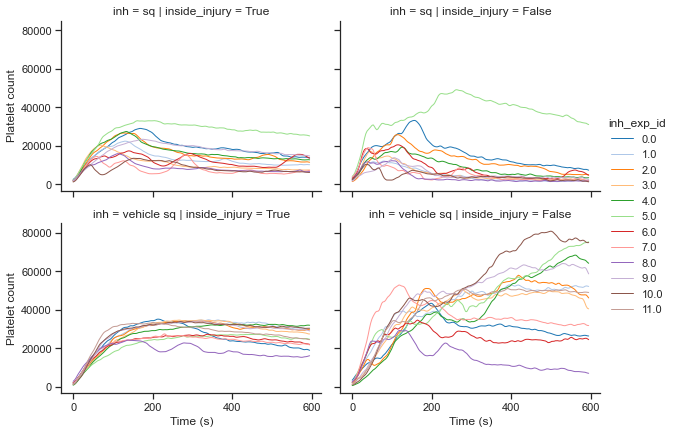

In [8]:
col_order=[True,False]
with sns.plotting_context("notebook", rc={"lines.linewidth": 1}):
    g=sns.relplot(x='time', y='roll',hue='inh_exp_id',col='inside_injury',col_order=col_order,
              kind='line',row='inh', row_order=inh_order, palette='tab20',data=df_grouped,
                  height=3, aspect=1.4,legend='full')
    g.set_ylabels('Platelet count')
    g.set_xlabels('Time (s)')
    plt.savefig(results_folder+f'plt_count ind exp {inh_order}.png',bbox_inches='tight', dpi=300)

Text(0, 0.5, 'Platelet count')

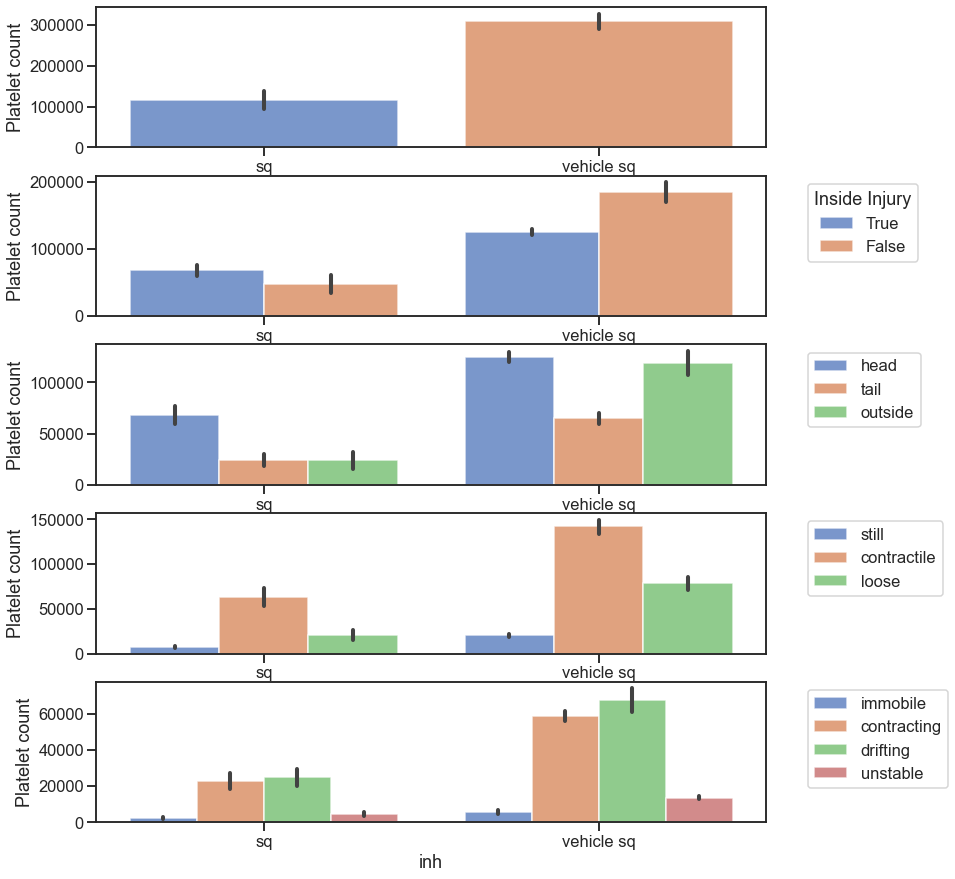

In [9]:
# BAR GRAPHS WITH THROMBUS PLT COUNT AUC 
#------------------------------------------------------------------------

#params_bars={x:"inh",order:inh_order, y:"pid", ci:70, palette:"vlag",alpha:.8}
params_dict=dict(x="inh",order=inh_order,y="pid", ci=70, palette=pal_many_c,alpha=.8)


dfg=df.groupby(['inh','inh_exp_id']).count()[['pid']].reset_index()
dfg1=df.groupby(['inh','inh_exp_id','inside_injury']).count()[['pid']].reset_index()
dfg2=df.groupby(['inh','inh_exp_id','position']).count()[['pid']].reset_index()
dfg3=df.groupby(['inh','inh_exp_id','mov_class']).count()[['pid']].reset_index()
dfg4=df.groupby(['inh','inh_exp_id','movement']).count()[['pid']].reset_index()

f = plt.figure(figsize=(12, 15))
gs = f.add_gridspec(5, 1)

ax = f.add_subplot(gs[0, 0])
g = sns.barplot(data=dfg, **params_dict)
ax.set_ylabel('Platelet count')

ax = f.add_subplot(gs[1, 0])
g = sns.barplot(data=dfg1, hue='inside_injury',hue_order=bol_order,**params_dict)
ax.legend(title='Inside Injury', bbox_to_anchor=(1.05, 1))
ax.set_ylabel('Platelet count')

ax = f.add_subplot(gs[2, 0])
g = sns.barplot(data=dfg2, hue='position',hue_order=position_order,**params_dict)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_ylabel('Platelet count')

ax = f.add_subplot(gs[3, 0])
g = sns.barplot(data=dfg3, hue='mov_class',hue_order=mov_class_order1,**params_dict)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_ylabel('Platelet count')

ax = f.add_subplot(gs[4, 0])
g = sns.barplot(data=dfg4, hue='movement',hue_order=movement_order1,**params_dict)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_ylabel('Platelet count')




    

Text(0, 0.5, 'Fraction (%)')

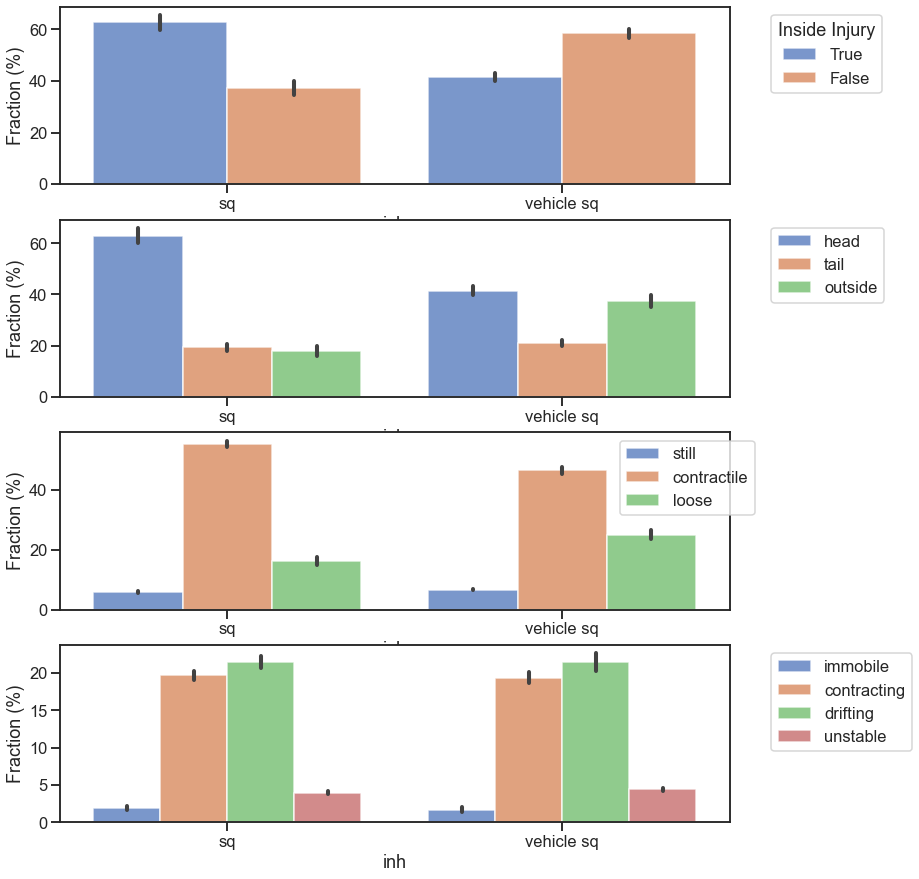

In [10]:
# BAR GRAPHS WITH DISTRIBUTION OF PLATELETS IN DIFFERENT SUBPOPULATIONS
#-----------------------------------------------------------------------------------------


dfg1=df.groupby(['inh','inh_exp_id','inside_injury']).agg({'pid':'count'})
dfg1 = dfg1.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()
dfg2=df.groupby(['inh','inh_exp_id','position']).agg({'pid':'count'})
dfg2 = dfg2.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()
dfg3=df.groupby(['inh','inh_exp_id','mov_class']).agg({'pid':'count'})
dfg3 = dfg3.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()
dfg4=df.groupby(['inh','inh_exp_id','movement']).agg({'pid':'count'})
dfg4 = dfg4.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()

f = plt.figure(figsize=(12, 15))
gs = f.add_gridspec(4, 1)

ax = f.add_subplot(gs[0, 0])
g = sns.barplot(data=dfg1, hue='inside_injury',hue_order=bol_order,**params_dict)
ax.legend(title='Inside Injury', bbox_to_anchor=(1.05, 1))
ax.set_ylabel('Fraction (%)')

ax = f.add_subplot(gs[1, 0])
g = sns.barplot(data=dfg2, hue='position',hue_order=position_order,**params_dict)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_ylabel('Fraction (%)')

ax = f.add_subplot(gs[2, 0])
g = sns.barplot(data=dfg3, hue='mov_class',hue_order=mov_class_order1,**params_dict)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_ylabel('Fraction (%)')

ax = f.add_subplot(gs[3, 0])
g = sns.barplot(data=dfg4, hue='movement',hue_order=movement_order1,**params_dict)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_ylabel('Fraction (%)')


['inh', 'inh_exp_id', 'time']


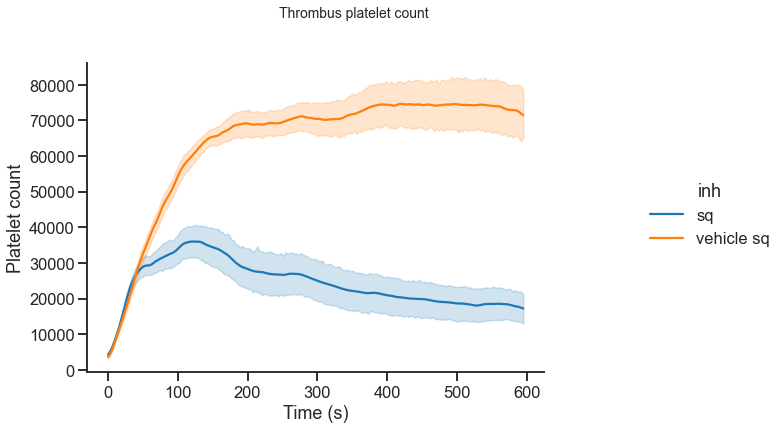

In [11]:
# LINEPLOT WITH PLT COUNT OVER TIME
#------------------------------------------------------
x_var=['time']
grouping_var=[]
df_grouped=rolling_count(df,grouping_var,x_var)

g=sns.relplot(y='roll',data=df_grouped, legend=True,**params_line)#legend=False
g.fig.set_size_inches(12,6)
g.set_ylabels('Platelet count')
g.set_xlabels('Time (s)')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Thrombus platelet count',fontsize=14) 
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., frameon=False, facecolor ='white', ncol=1)#labels=inh_order2


plt.savefig(results_folder+f'plt_count {inh_order}.png',bbox_inches='tight', dpi=300)

['position', 'inh', 'inh_exp_id', 'time']


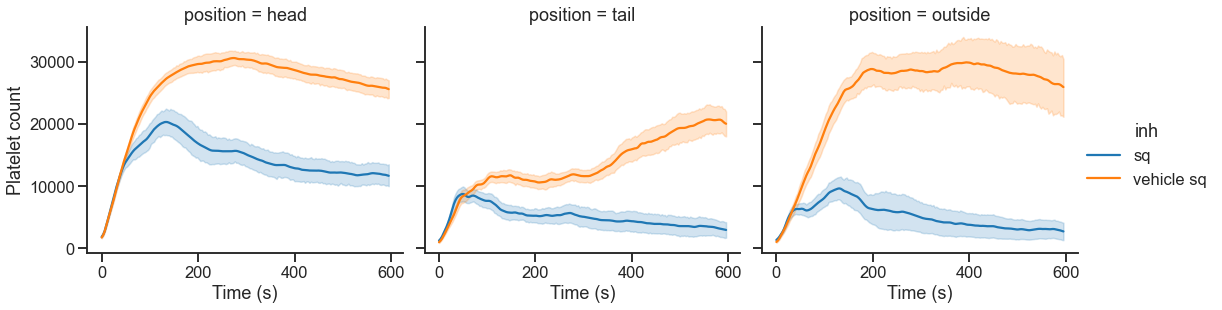

In [12]:
# LINEPLOT WITH PLT COUNT IN DIFFERENT POSITIONS OVER TIME
#-.....................................................................

x_var=['time']
grouping_var=['position']
df_grouped=rolling_count(df,grouping_var,x_var)

g=sns.relplot(y='roll',col='position',col_order=position_order, data=df_grouped,**params_line)
g.set_ylabels('Platelet count')
g.set_xlabels('Time (s)')
plt.subplots_adjust(top=0.92)
plt.savefig(results_folder+f'plt_count position {inh_order}.png',bbox_inches='tight', dpi=300)

['inside_injury', 'inh', 'inh_exp_id', 'time']


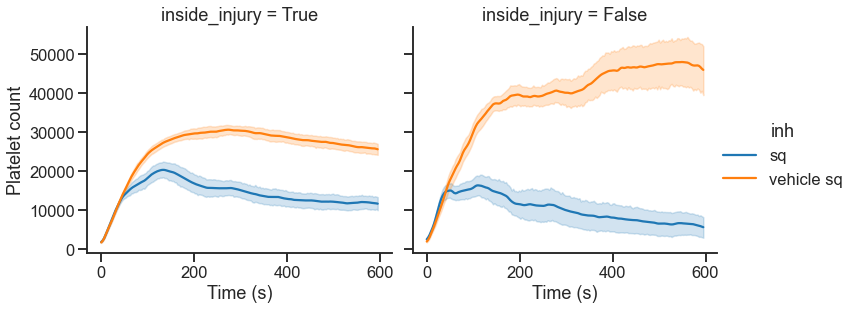

In [13]:
# LINEPLOT WITH PLT COUNT INSIDE & OUTSIDE INJURY OVER TIME
#-.....................................................................

grouping_var=['inside_injury']
df_grouped=rolling_count(df,grouping_var,x_var)

g=sns.relplot(y='roll',col='inside_injury',col_order=bol_order, data=df_grouped,**params_line)
g.set_ylabels('Platelet count')
g.set_xlabels('Time (s)')
plt.subplots_adjust(top=0.92)
plt.savefig(results_folder+f'plt_count inside_inj {inh_order}.png',bbox_inches='tight', dpi=300)

# Other plots - stability etc

In [14]:
sns.set_style('ticks')

['inside_injury', 'inh', 'inh_exp_id', 'time']


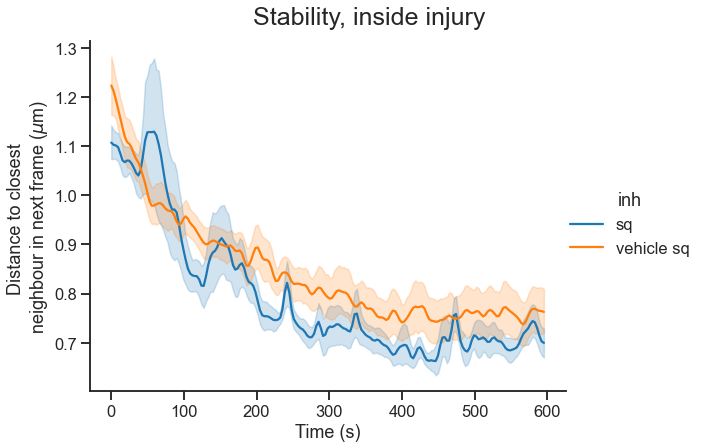

In [15]:
# LINEPLOT SHOWING STAB OVER TIME INSIDE INJURY 
#-----------------------------------------------------

grouping_var='inside_injury'
y_var='stab'
x_var=['time']
dfg=rolling_mean(df,grouping_var,y_var,x_var)

dfg1=dfg[dfg.inside_injury==True]
g = sns.relplot(x="time", y='roll', hue='inh',ci=70, data=dfg1, kind="line", aspect=1.25, height=6,
                hue_order=inh_order)#

#g.set(xlim=[0,300],xticks=[0,100,200],ylim=[0,3])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Stability, inside injury',fontsize=25) 
g.set_ylabels("Distance to closest \nneighbour in next frame ($\mu$m)")
g.set_xlabels("Time (s)")

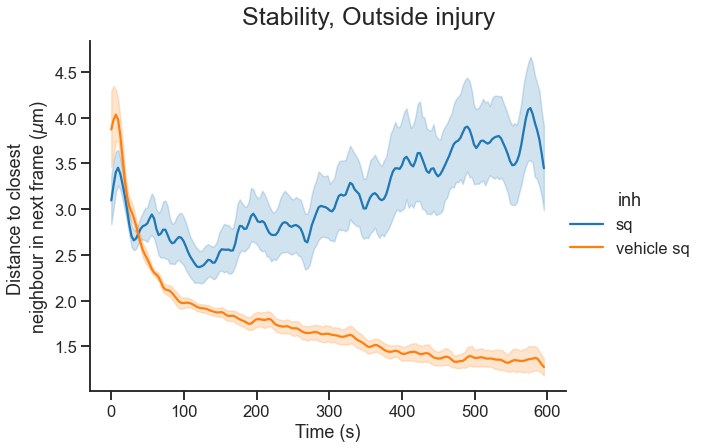

In [16]:
# LINEPLOT SHOWING STAB OVER TIME OUTSIDE INJURY 
#-----------------------------------------------------

dfg1=dfg[dfg.inside_injury==False]
g = sns.relplot(x="time", y='roll', hue='inh',ci=70, data=dfg1, kind="line", aspect=1.25, height=6,
                hue_order=inh_order)#

#g.set(xlim=[0,300],xticks=[0,100,200],ylim=[1,7])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Stability, Outside injury',fontsize=25) 
g.set_ylabels("Distance to closest \nneighbour in next frame ($\mu$m)")
g.set_xlabels("Time (s)")

['inside_injury', 'inh', 'inh_exp_id', 'time']


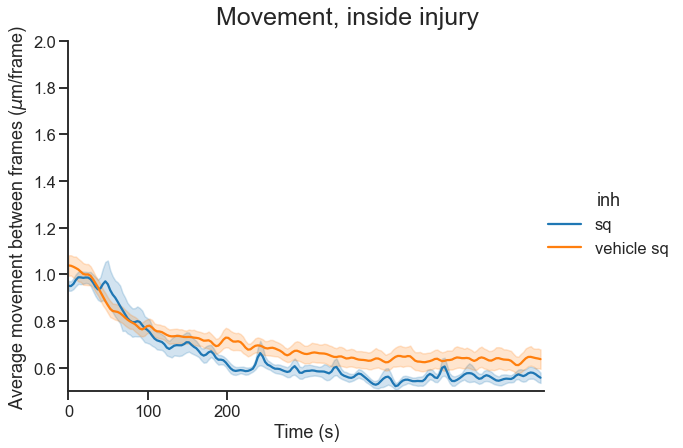

In [17]:
# LINEPLOT SHOWING AVERAGE MOVEMENT INSIDE INJURY
#------------------------------------------------------

grouping_var='inside_injury'
y_var='dv'
x_var=['time']
dfg=rolling_mean(df,grouping_var,y_var,x_var)

dfg1=dfg[dfg.inside_injury==True]
g = sns.relplot(x="time", y='roll', hue='inh',ci=70, data=dfg1, kind="line", aspect=1.25, height=6,
                hue_order=inh_order)#

g.set(xlim=[0,600],xticks=[0,100,200],ylim=[0.5,2.0])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Movement, inside injury',fontsize=25) 
g.set_ylabels("Average movement between frames ($\mu$m/frame)")
g.set_xlabels("Time (s)")

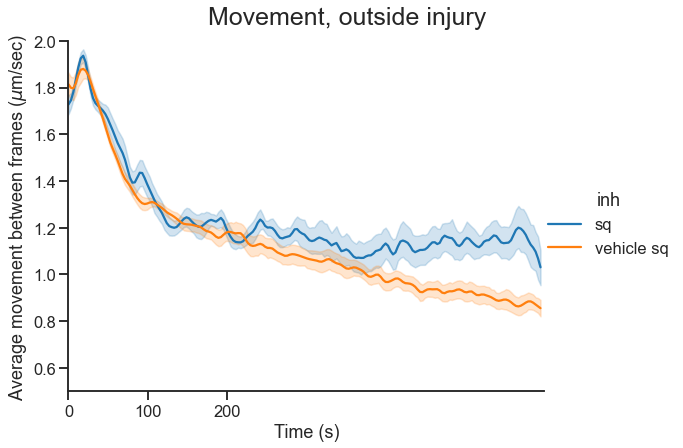

In [18]:
# LINEPLOT SHOWING AVERAGE MOVEMENT OUTSIDE INJURY
#------------------------------------------------------

dfg1=dfg[dfg.inside_injury==False]
g = sns.relplot(x="time", y='roll', hue='inh',ci=70, data=dfg1, kind="line", aspect=1.25, height=6,
                hue_order=inh_order)#

g.set(xlim=[0,600],xticks=[0,100,200],ylim=[0.5,2.0])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Movement, outside injury',fontsize=25) 
g.set_ylabels("Average movement between frames ($\mu$m/sec)")
g.set_xlabels("Time (s)")

['inside_injury', 'inh', 'inh_exp_id', 'time']


Text(0.5, 0.98, 'Fraction unstable platelets')

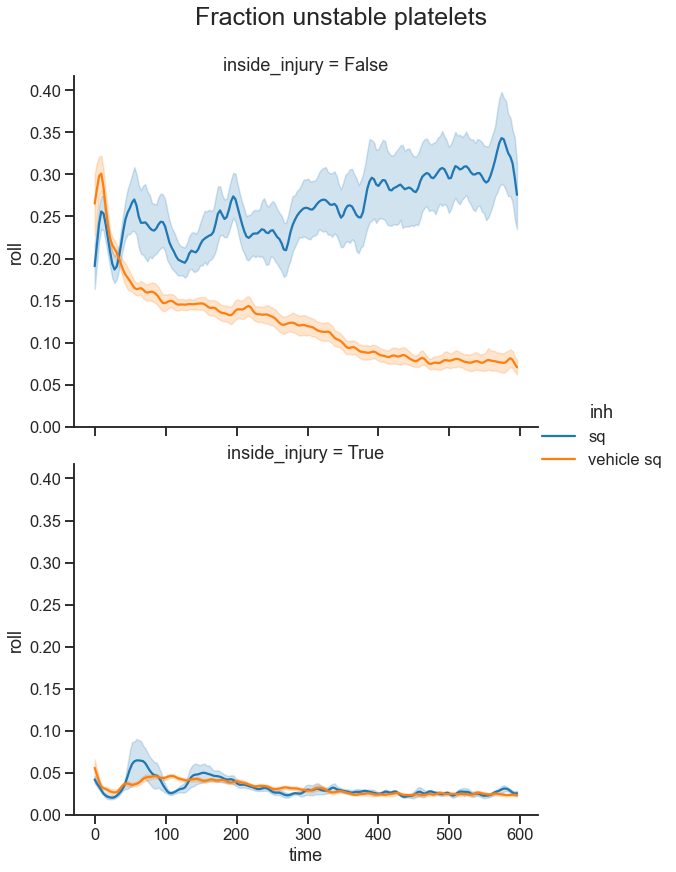

In [19]:
#LINEPLOT SHOWING FRACTION OF ALL PLATELETS THAT ARE UNSTABLE (STAB) INSIDE & OUTSIDE INJURY OVER TIME
#-----------------------------------------------------------------------------------------------------

df2=df[df.stab>3]
grouping_var=['inside_injury']
x_var=['time']
dfg=rolling_perc(df,df2,grouping_var,x_var)
g = sns.relplot(x="time", y='roll', hue='inh',ci=70, row='inside_injury',data=dfg, kind="line", aspect=1.25, height=6,
                hue_order=inh_order)#
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Fraction unstable platelets',fontsize=25) 

['inh', 'inh_exp_id', 'time']


Text(0.5, 0.98, 'Fraction unstable platelets')

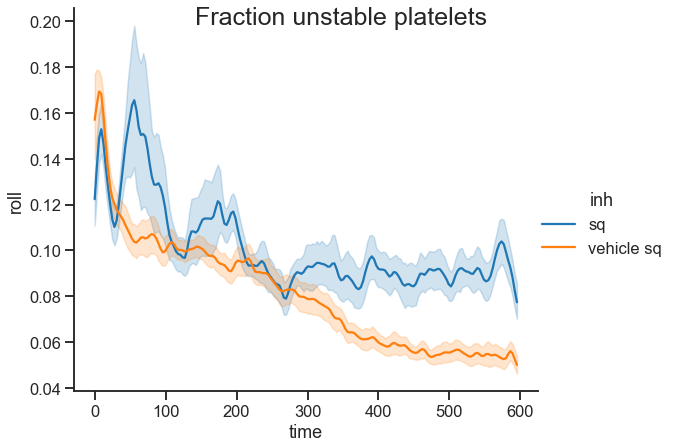

In [20]:
#LINEPLOT SHOWING FRACTION OF ALL PLATELETS THAT ARE UNSTABLE (STAB) IN ENTIRE THROMBUS OVER TIME
#-----------------------------------------------------------------------------------------------------

df2=df[df.stab>3]
grouping_var=[]
x_var=['time']
dfg=rolling_perc(df,df2,grouping_var,x_var)
g = sns.relplot(x="time", y='roll', hue='inh',ci=70,data=dfg, kind="line", aspect=1.25, height=6,
                hue_order=inh_order)#
g.fig.suptitle('Fraction unstable platelets',fontsize=25) 

['inh', 'inh_exp_id', 'time']


Text(0.5, 0.98, 'Fraction unstable platelets')

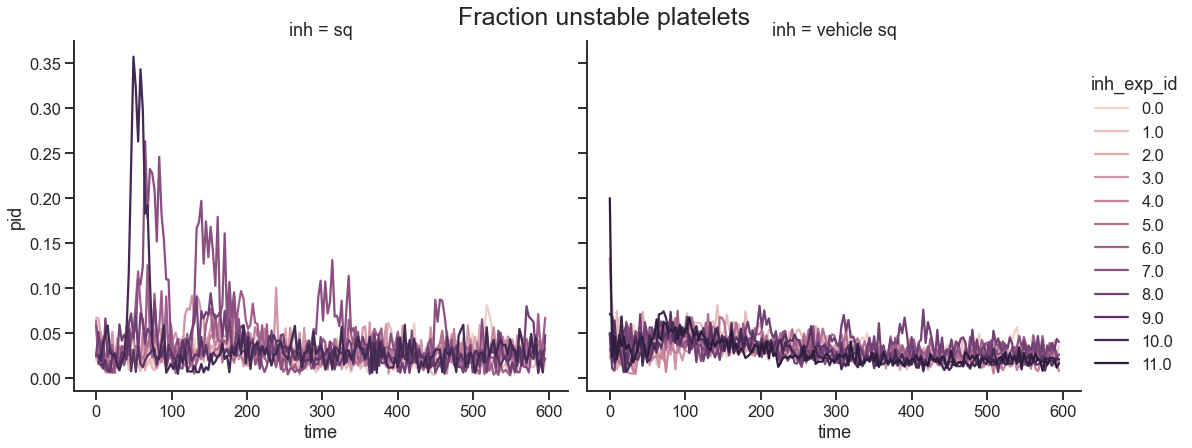

In [21]:
#LINEPLOT SHOWING FRACTION OF ALL PLATELETS THAT ARE UNSTABLE (STAB) INSIDE INJURY OVER TIME, EACH EXP SHOWN INDIVIDUALLY
#-----------------------------------------------------------------------------------------------------
dfi=df[df.inside_injury==True]
df2=dfi[dfi.stab>3]
grouping_var=[]
x_var=['time']
dfg=rolling_perc(dfi,df2,grouping_var,x_var)
g = sns.relplot(x="time", y='pid', col='inh',col_wrap=2, hue='inh_exp_id',ci=70, 
                data=dfg,kind="line", aspect=1.25, height=6,col_order=inh_order,legend='full')#
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Fraction unstable platelets',fontsize=25)

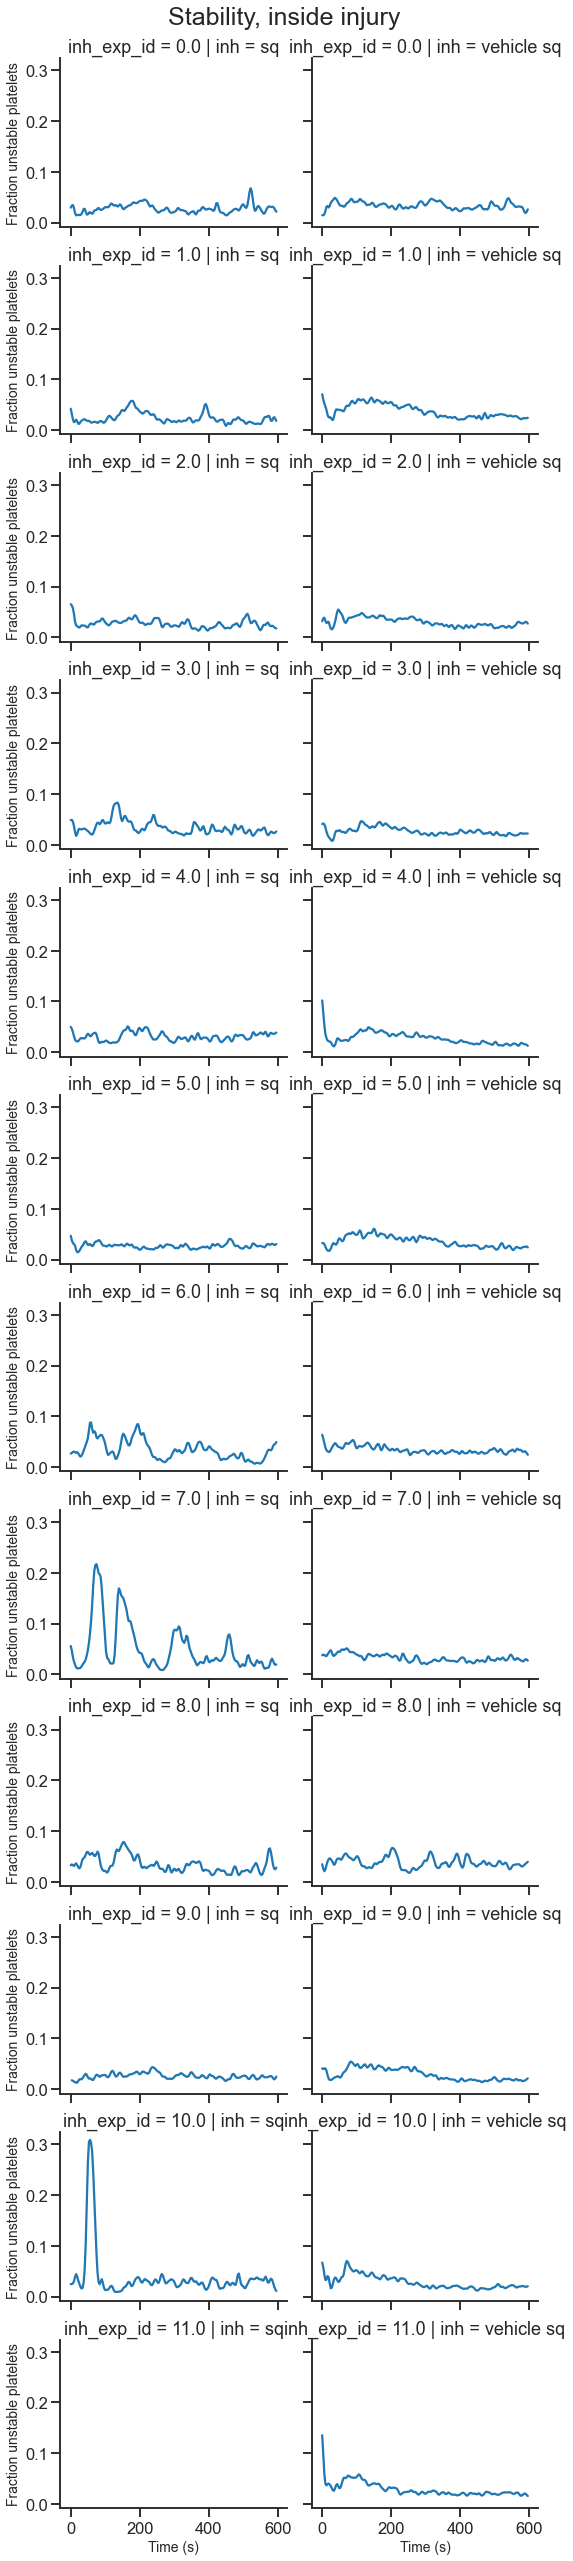

In [22]:
# AS ABOVE BUT EVERY INDIVIDUAL EXPERIMENT IN SEPARATE PLOT
#-------------------------------------------------------------------------------------------

g = sns.relplot(x="time", y='roll', col='inh',col_order=inh_order, row='inh_exp_id',
                data=dfg, kind="line", aspect=1.25, height=3)#col='inside_injury',col_order=col_order, 
#g.set(xlim=[0,600],xticks=[0,100,200],ylim=[0,1])
plt.subplots_adjust(top=0.96)
g.fig.suptitle('Stability, inside injury',fontsize=25) 
#plt.subplots_adjust(top=0.75)
g.set_ylabels("Fraction unstable platelets",fontsize=14)
g.set_xlabels("Time (s)",fontsize=14)
#plt.savefig('lineplot_coredist_5plts.svg',transparent=True)

#plt.savefig(results_folder+f'\\lineplot_perc unstable par4 cohort inside injury.png',bbox_inches='tight', dpi=300)

['inh', 'inh_exp_id', 'time']


Text(0.5, 0.98, 'Count newly recruited platelets')

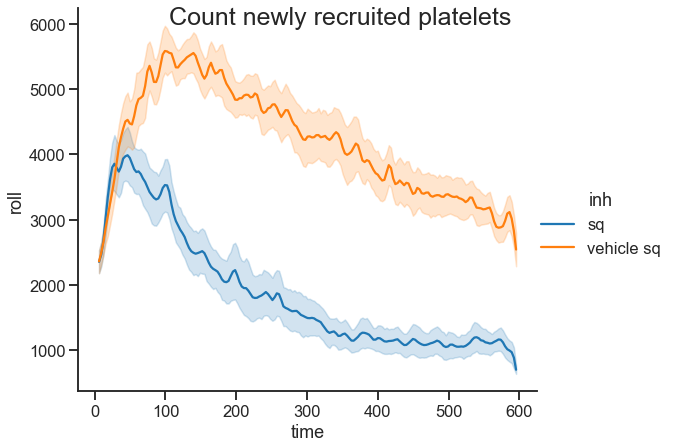

In [23]:
#LINEPLOT SHOWING COUNT OF NEWLY RECRUITED PLATELETS 
df2=df[(df.frame>1)&(df.tracknr<2)]
grouping_var=[]
x_var=['time']
dfg=rolling_count(df2,grouping_var,x_var)
g = sns.relplot(x="time", y='roll', hue='inh',ci=70,data=dfg, kind="line", aspect=1.25, height=6,
                hue_order=inh_order)#
g.fig.suptitle('Count newly recruited platelets',fontsize=25) 

['inh', 'inh_exp_id', 'time']


Text(0.5, 0.98, 'Fraction newly recruited platelets')

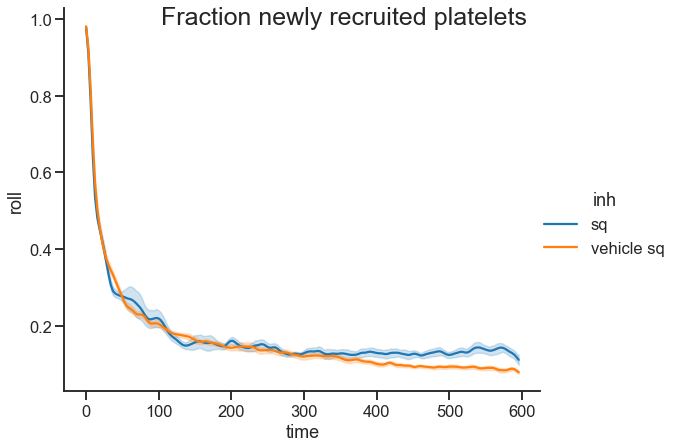

In [24]:
#LINEPLOT WITH FRACTION NEWLY RECRUITED PLATELETS
#-----------------------------------------------
df2=df[df.tracknr<3]
grouping_var=[]
x_var=['time']
dfg=rolling_perc(df,df2,grouping_var,x_var)
g = sns.relplot(x="time", y='roll', hue='inh',ci=70,data=dfg, kind="line", aspect=1.25, height=6,
                hue_order=inh_order)#
g.fig.suptitle('Fraction newly recruited platelets',fontsize=25) 

['inside_injury', 'inh', 'inh_exp_id', 'time']


Text(0.5, 0.98, 'Fraction newly recuited platelets')

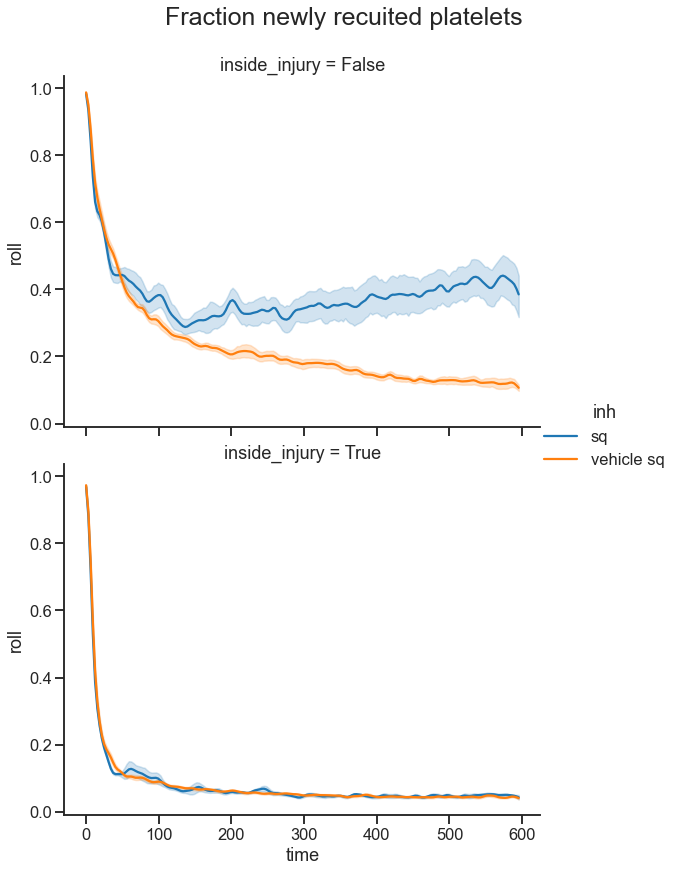

In [25]:
# LINEPLOT WITH FRACTION NEWLY RECRUITED PLATELETS INSIDE & OUTSIDE INJURY
df2=df[df.tracknr<3]
grouping_var=['inside_injury']
x_var=['time']
dfg=rolling_perc(df,df2,grouping_var,x_var)
g = sns.relplot(x="time", y='roll', hue='inh',ci=70,data=dfg, row='inside_injury', kind="line", aspect=1.25, height=6,
                hue_order=inh_order)#
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Fraction newly recuited platelets',fontsize=25) 

['inside_injury', 'inh', 'inh_exp_id', 'time']


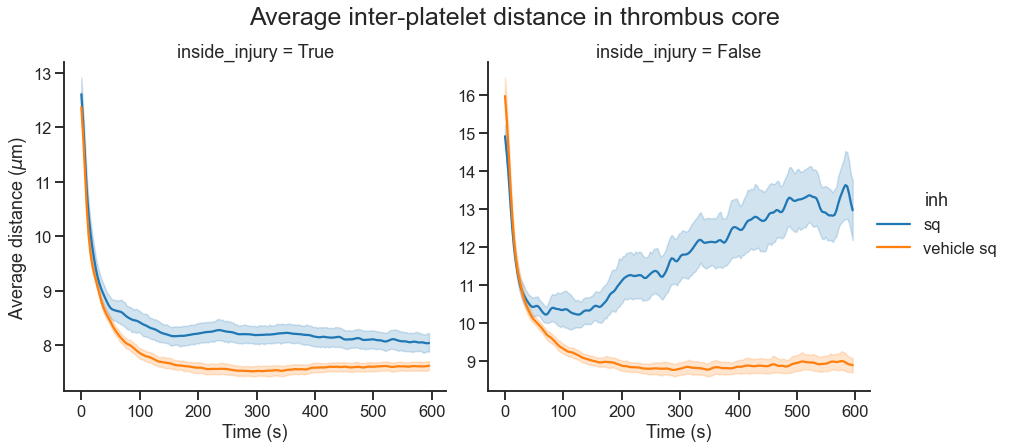

In [26]:
grouping_var='inside_injury'
y_var='nba_d_10'
x_var=['time']
bin_order=[True,False]
dfg=rolling_mean(df,grouping_var,y_var,x_var)
g = sns.relplot(x="time", y='roll', hue='inh',ci=70,data=dfg, col='inside_injury',col_order=bin_order,
                kind="line", height=6,hue_order=inh_order,facet_kws={'sharey': False})#
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Average inter-platelet distance in thrombus core',fontsize=25) 
g.set_xlabels("Time (s)")
g.set_ylabels("Average distance ($\mu$m)")

dfg=df[(~df.inh.isin(['biva','par4--biva']))&(df.height=='bottom')].copy()
#g=sns.jointplot(data=dfg, x="c1_mean", y="stab", hue="inh", kind="kde")
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=30, cmap=cmap, **kwargs)

g = sns.FacetGrid(dfg, hue="inh", row="inh", size=8)
g.map(hexbin, "c1_mean", "stab", extent=[0, 2500, 0, 5])

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

g = sns.FacetGrid(tips, hue="time", col="time", size=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10])


In [10]:
inh_order2=['ctrl', 'par4+-', 'par4-+', 'par4--']


dfg=df[(~df.inh.isin(['biva','par4--biva']))&(df.height=='bottom')].copy()
#df[(df.frame<50)&(~df.inh.isin(['biva','par4--biva']))&(df.height=='bottom')].copy()
binned_var='c1_mean'
bins=25
dfg,bin_var=qbinning_labels(dfg,binned_var,bins)
#bin_label=f'{binned_var}_binlabel'
#dfg=dfg.groupby(['inh','exp_id',bin_var]).median().reset_index()#Maybe median better than mean?
#dfg1=dfg.groupby(['inh','exp_id',bin_var]).median().reset_index()#Maybe median better than mean?
#dfg1=dfg.groupby(['inh','exp_id',bin_var]).median().reset_index()#Maybe median better than mean?
#dfg2=dfg.groupby(['inh',bin_var]).mean().reset_index()#Maybe median better than mean?

print(f'Name of binned var labels: {bin_var}')

dfg=df[(~df.inh.isin(['biva','par4--biva']))&(df.height=='bottom')].copy()
dfg.loc[:,'phase'] = pd.qcut(df['time'], 3, labels=['Early','Mid','Late'])
#df[(df.frame<50)&(~df.inh.isin(['biva','par4--biva']))&(df.height=='bottom')].copy()
binned_var='c1_mean'
bins=25
dfg,bin_var=qbinning_labels1(dfg,binned_var,bins)

In [27]:


dfg=df[(df.height=='bottom')].copy()
dfg.loc[:,'phase'] = pd.qcut(df['time'], 3, labels=['Early','Mid','Late'])
#df[(df.frame<50)&(~df.inh.isin(['biva','par4--biva']))&(df.height=='bottom')].copy()
binned_var='c1_mean'
bins=10
dfg,bin_var,bin_order=qbinning_labels(dfg,binned_var,bins)

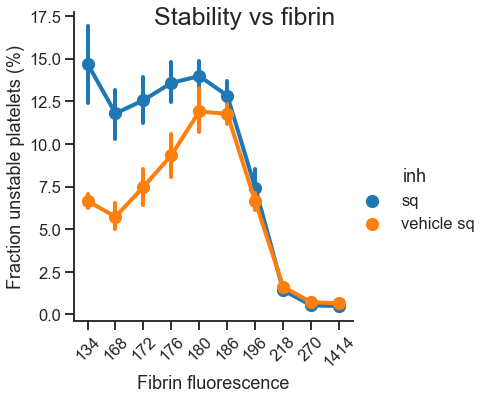

In [28]:

dfg1=dfg.groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg2=dfg[dfg.stab>3].groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg3=dfg2/dfg1*100
dfg3=dfg3.reset_index()


g=sns.catplot(data=dfg3,y='pid',ci=70,x=bin_var,order=bin_order,hue='inh',kind='point',hue_order=inh_order)#row='phase'
#g.set(xscale='log',xlim=[130,4000])
g.fig.suptitle('Stability vs fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Fraction unstable platelets (%)")
g.set_xticklabels(rotation=45)
#g.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(int(x))))
#dfg1 = dfg1.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()


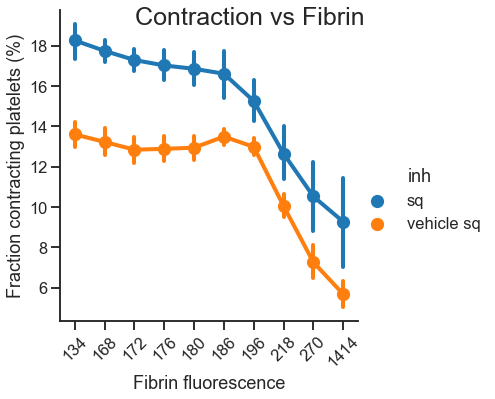

In [29]:
dfg1=dfg.groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg2=dfg[dfg.movement=='contracting'].groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg3=dfg2/dfg1*100
dfg3=dfg3.reset_index()


g=sns.catplot(data=dfg3,y='pid',ci=70,x=bin_var,order=bin_order,hue='inh',kind='point',hue_order=inh_order)#row='phase'
#g.set(xscale='log',xlim=[130,4000])
g.fig.suptitle('Contraction vs Fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Fraction contracting platelets (%)")
g.set_xticklabels(rotation=45)

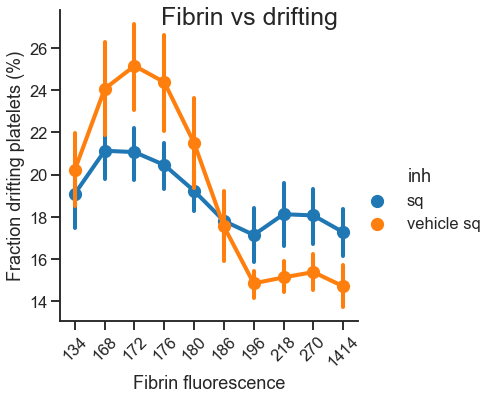

In [30]:
dfg1=dfg.groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg2=dfg[dfg.movement=='drifting'].groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg3=dfg2/dfg1*100
dfg3=dfg3.reset_index()


g=sns.catplot(data=dfg3,y='pid',ci=70,x=bin_var,order=bin_order,hue='inh',kind='point',hue_order=inh_order)#row='phase'
#g.set(xscale='log',xlim=[130,4000])
g.fig.suptitle('Fibrin vs drifting',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Fraction drifting platelets (%)")
g.set_xticklabels(rotation=45)
#dfg1 = dfg1.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()

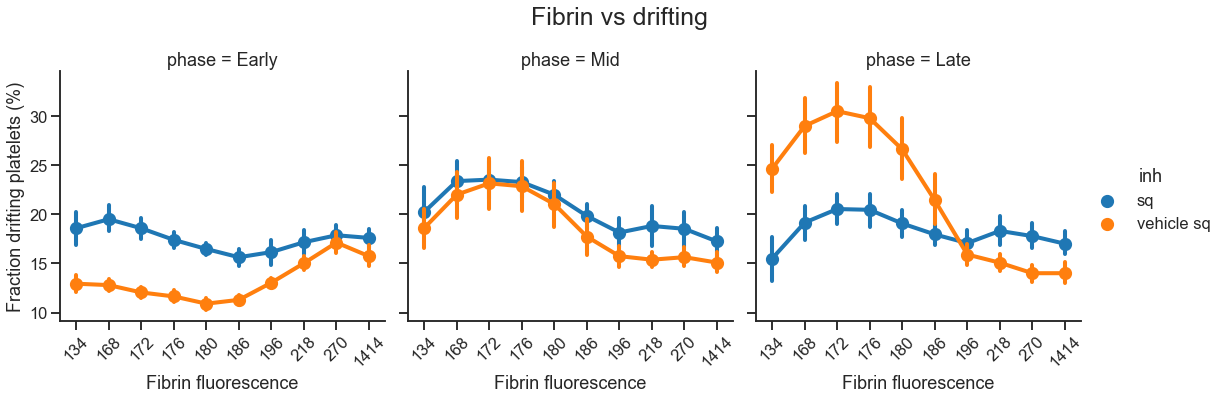

In [31]:
dfg1=dfg.groupby(['inh','inh_exp_id','phase',bin_var]).agg({'pid':'count'})#'phase',
dfg2=dfg[dfg.movement=='drifting'].groupby(['inh','inh_exp_id','phase',bin_var]).agg({'pid':'count'})#'phase',
dfg3=dfg2/dfg1*100
dfg3=dfg3.reset_index()


g=sns.catplot(data=dfg3,y='pid',ci=70,x=bin_var,order=bin_order,hue='inh',kind='point',col='phase',hue_order=inh_order)#row='phase'
#g.set(xscale='log',xlim=[130,4000])
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Fibrin vs drifting',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Fraction drifting platelets (%)")
g.set_xticklabels(rotation=45)
#dfg1 = dfg1.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()

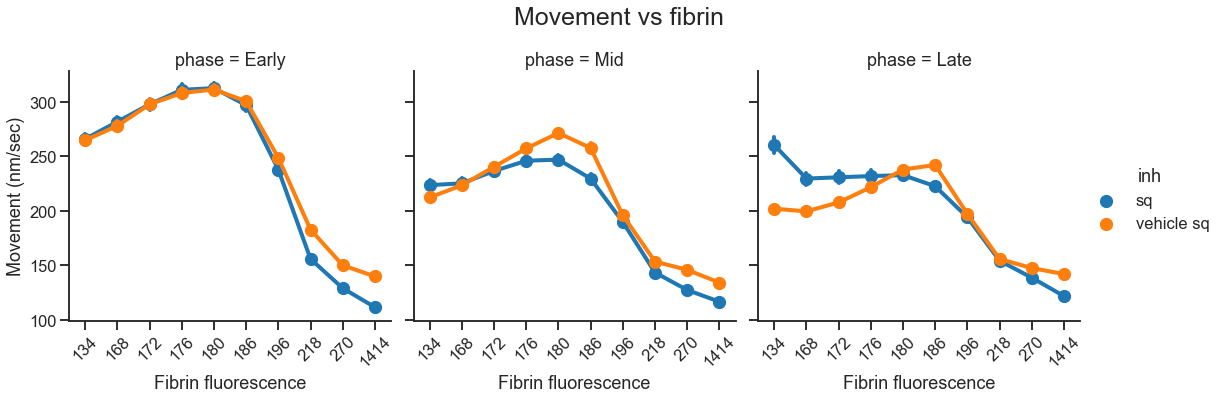

In [32]:
dfg['dv_s']=dfg.dv*1000/3.1
g=sns.catplot(data=dfg,y='dv_s',ci=99,x=bin_var,order=bin_order,hue='inh',col='phase',kind='point', hue_order=inh_order)
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Movement vs fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Movement (nm/sec)")
g.set_xticklabels(rotation=45)

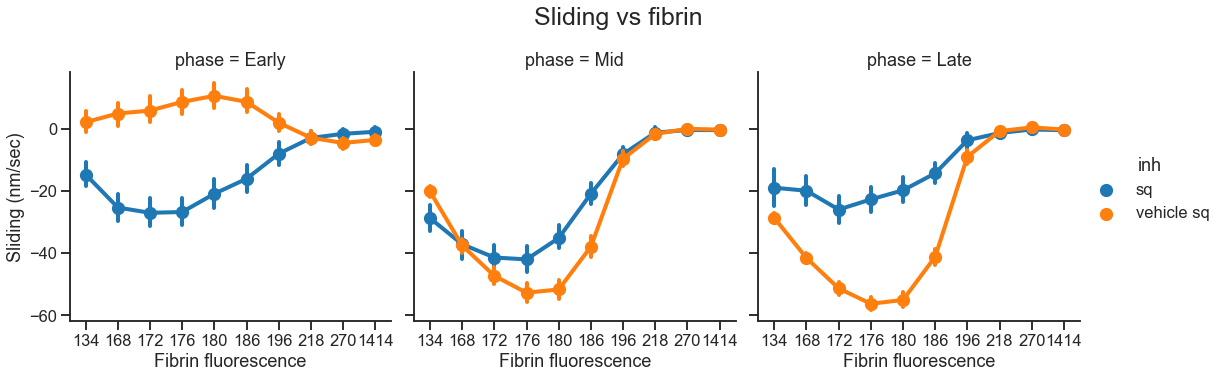

In [33]:
dfg['dvy_s']=dfg.dvy*1000/3.1
g=sns.catplot(data=dfg,y='dvy_s',ci=99,x=bin_var,order=bin_order,hue='inh',col='phase',kind='point', hue_order=inh_order)

plt.subplots_adjust(top=0.80)
g.fig.suptitle('Sliding vs fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Sliding (nm/sec)")

In [34]:
dfg=df[(df.height=='bottom')].copy()
dfg.loc[:,'phase'] = pd.qcut(df['time'], 3, labels=['Early','Mid','Late'])
#df[(df.frame<50)&(~df.inh.isin(['biva','par4--biva']))&(df.height=='bottom')].copy()
binned_var='c1_mean'
bins=25
dfg,bin_var=qbinning_labels1(dfg,binned_var,bins)

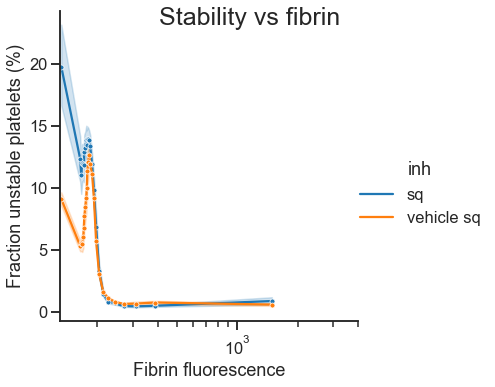

In [35]:
dfg1=dfg.groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg2=dfg[dfg.stab>3].groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg3=dfg2/dfg1*100
dfg3=dfg3.reset_index()


g=sns.relplot(data=dfg3,y='pid',ci=70,x=bin_var,hue='inh',kind='line',marker='o',markersize=5,hue_order=inh_order)#row='phase'
g.set(xscale='log',xlim=[130,4000])
g.fig.suptitle('Stability vs fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Fraction unstable platelets (%)")
#dfg1 = dfg1.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()

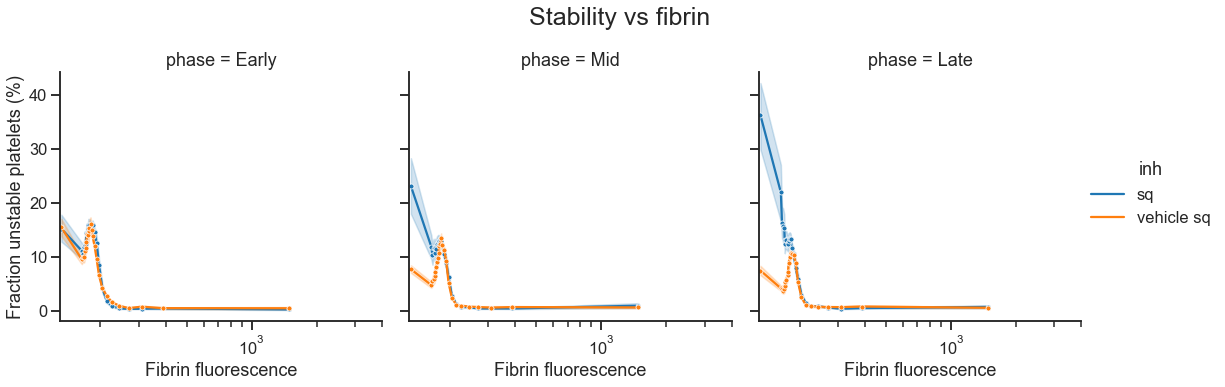

In [36]:
dfg1=dfg.groupby(['inh','inh_exp_id','phase',bin_var]).agg({'pid':'count'})#'phase',
dfg2=dfg[dfg.stab>3].groupby(['inh','inh_exp_id','phase',bin_var]).agg({'pid':'count'})#'phase',
dfg3=dfg2/dfg1*100
dfg3=dfg3.reset_index()


g=sns.relplot(data=dfg3,y='pid',ci=70,x=bin_var,hue='inh',kind='line',marker='o',markersize=5,col='phase',hue_order=inh_order)#row='phase'
g.set(xscale='log',xlim=[130,4000])
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Stability vs fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Fraction unstable platelets (%)")
#dfg1 = dfg1.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()

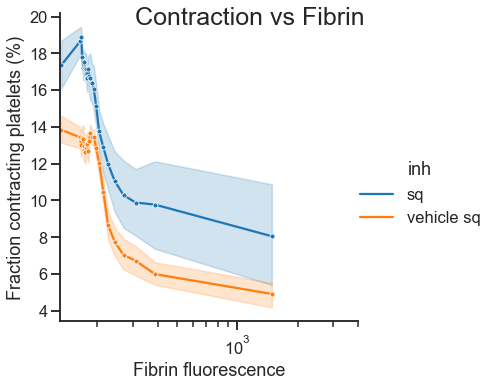

In [37]:
dfg1=dfg.groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg2=dfg[dfg.movement=='contracting'].groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg3=dfg2/dfg1*100
dfg3=dfg3.reset_index()


g=sns.relplot(data=dfg3,y='pid',ci=70,x=bin_var,hue='inh',kind='line',marker='o',markersize=5,hue_order=inh_order)#row='phase'
g.set(xscale='log',xlim=[130,4000])
g.fig.suptitle('Contraction vs Fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Fraction contracting platelets (%)")
#dfg1 = dfg1.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()

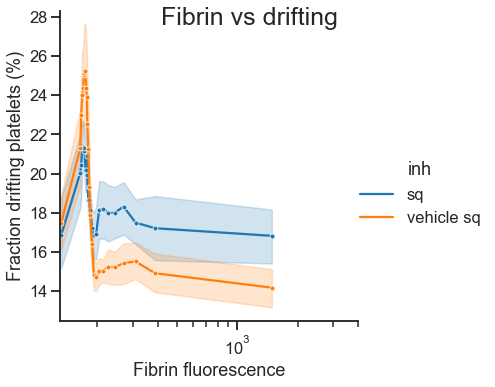

In [38]:
dfg1=dfg.groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg2=dfg[dfg.movement=='drifting'].groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg3=dfg2/dfg1*100
dfg3=dfg3.reset_index()


g=sns.relplot(data=dfg3,y='pid',ci=70,x=bin_var,hue='inh',kind='line',marker='o',markersize=5,hue_order=inh_order)#row='phase'
g.set(xscale='log',xlim=[130,4000])
g.fig.suptitle('Fibrin vs drifting',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Fraction drifting platelets (%)")
#dfg1 = dfg1.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()

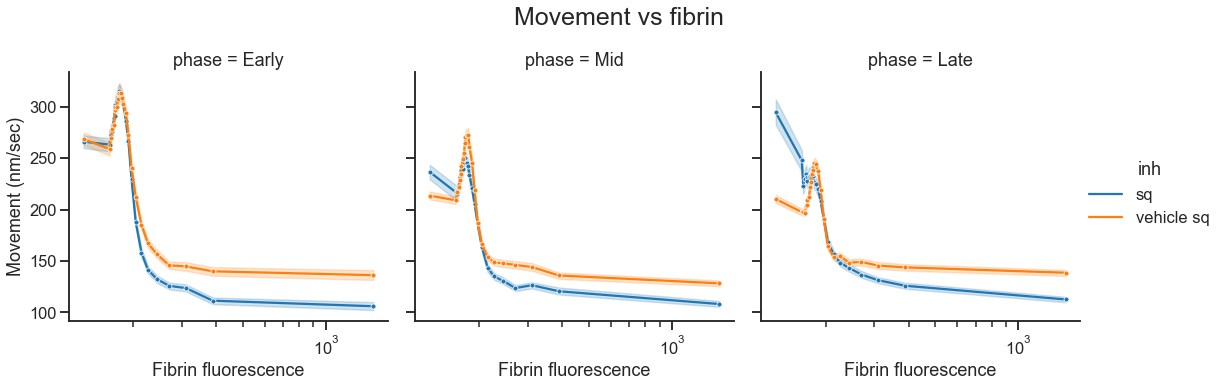

In [39]:
dfg['dv_s']=dfg.dv*1000/3.1
g=sns.relplot(data=dfg,y='dv_s',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5,kind='line',hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Movement vs fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Movement (nm/sec)")

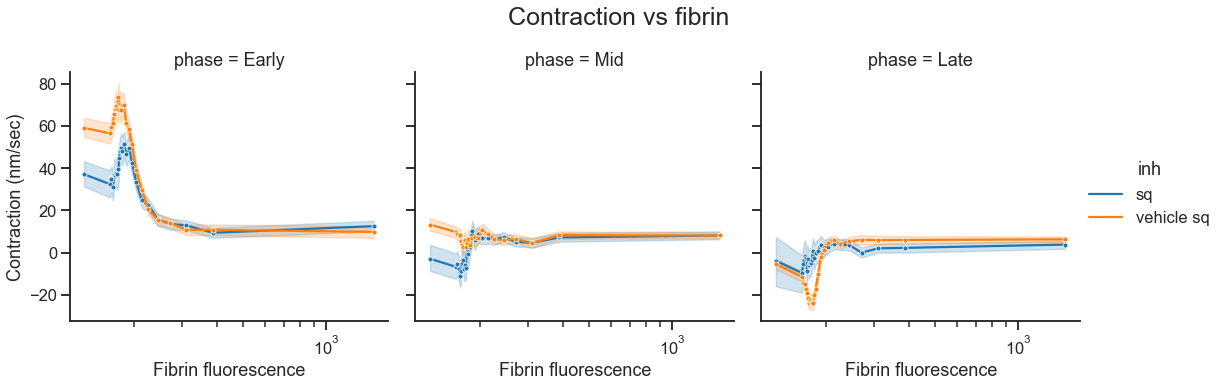

In [40]:
g=sns.relplot(data=dfg,y='cont_s',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5,kind='line',hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Contraction vs fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Contraction (nm/sec)")

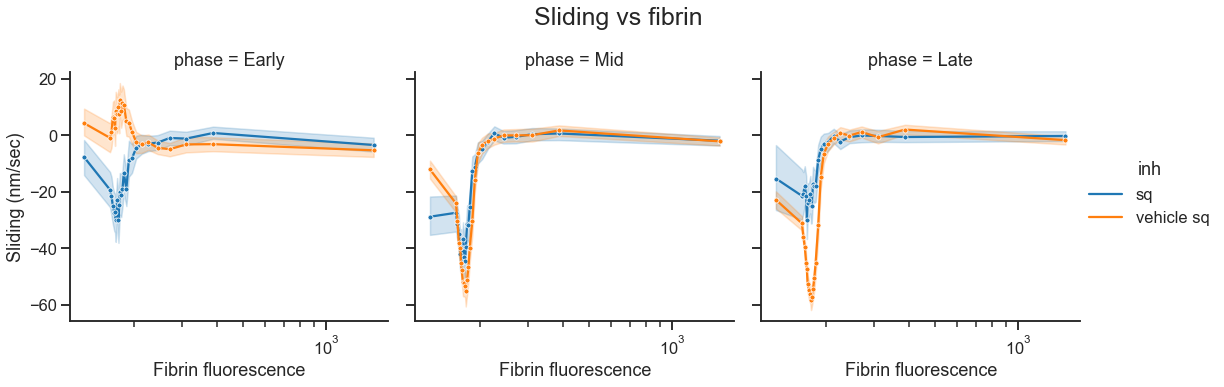

In [41]:
dfg['dvy_s']=dfg.dvy*1000/3.1
g=sns.relplot(data=dfg,y='dvy_s',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5,kind='line',hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Sliding vs fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Sliding (nm/sec)")

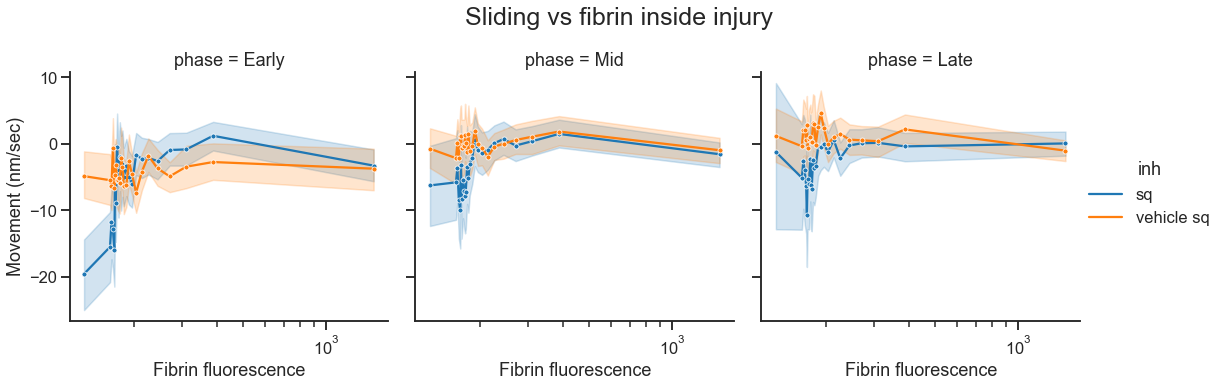

In [42]:
g=sns.relplot(data=dfg[dfg.inside_injury==True],y='dvy_s',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5
              ,kind='line',hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Sliding vs fibrin inside injury',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Movement (nm/sec)")

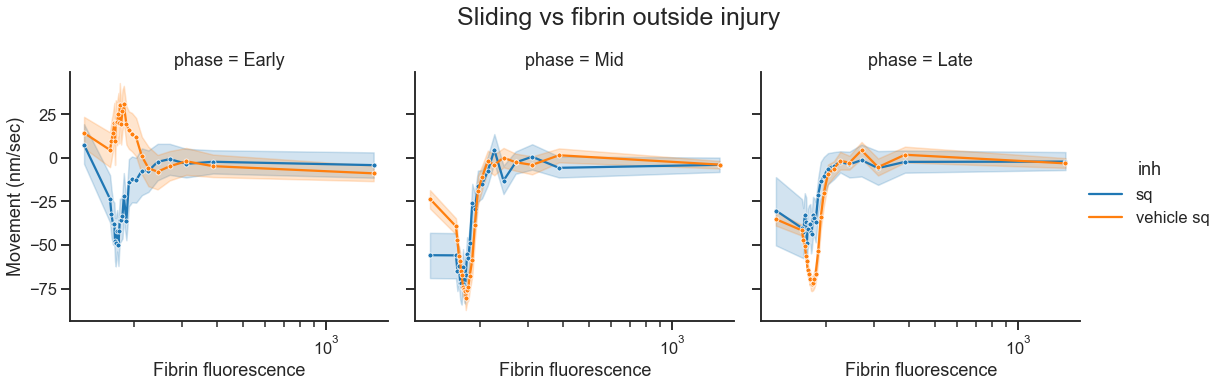

In [43]:
g=sns.relplot(data=dfg[dfg.inside_injury==False],y='dvy_s',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5
              ,kind='line',hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Sliding vs fibrin outside injury',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Movement (nm/sec)")

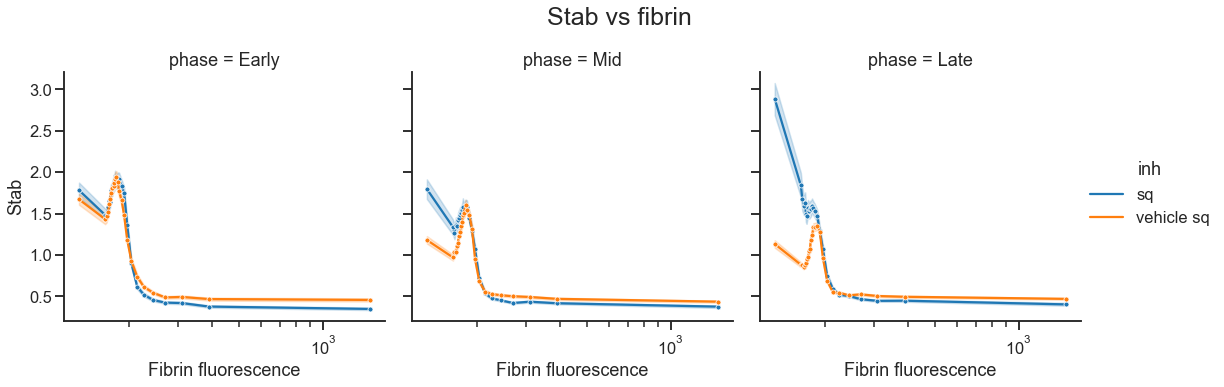

In [44]:
g=sns.relplot(data=dfg,y='stab',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5,kind='line',hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Stab vs fibrin',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("Stab")

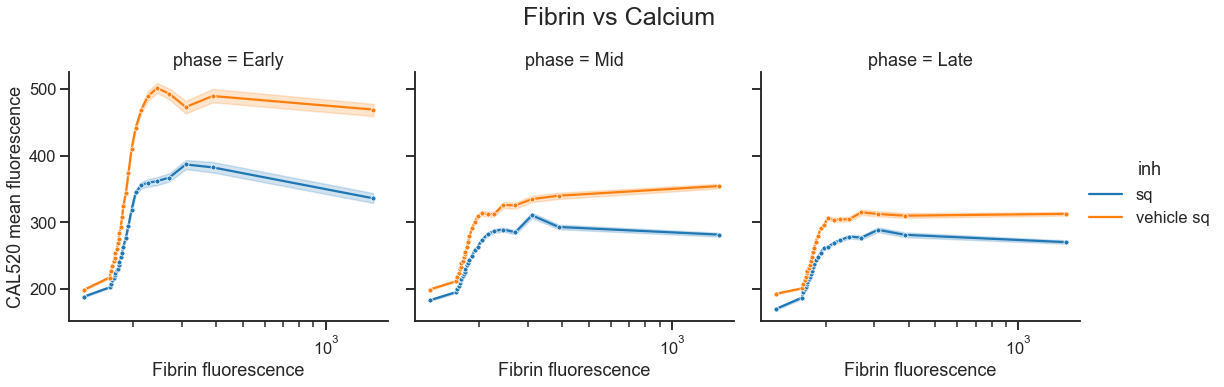

In [45]:
g=sns.relplot(data=dfg,y='c0_mean',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5,kind='line',hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Fibrin vs Calcium',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("CAL520 mean fluorescence")

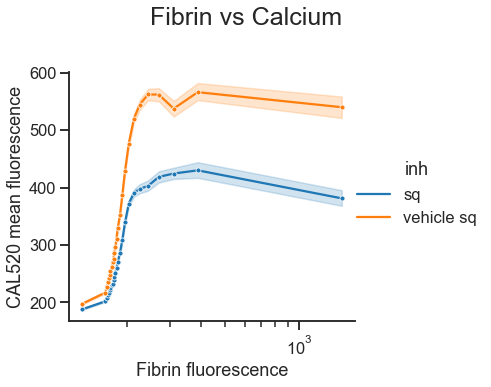

In [46]:
g=sns.relplot(data=dfg[dfg.frame<50],y='c0_mean',ci=99,x=bin_var,hue='inh',marker='o',markersize=5,kind='line',hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Fibrin vs Calcium',fontsize=25) 
g.set_xlabels("Fibrin fluorescence")
g.set_ylabels("CAL520 mean fluorescence")

In [47]:
df.loc[:,'minute'] = pd.cut(df['time'], 10, labels=list(range(1,11,1)))


In [164]:
%run Dataframe_Functions.ipynb
%run Graphical_Functions.ipynb

In [48]:
dfg=df[(df.height=='bottom')].copy()
dfg.loc[:,'phase'] = pd.qcut(df['time'], 3, labels=['Early','Mid','Late'])
#df[(df.frame<50)&(~df.inh.isin(['biva','par4--biva']))&(df.height=='bottom')].copy()
binned_var='c0_mean'
bins=25
dfg,bin_var=qbinning_labels1(dfg,binned_var,bins)

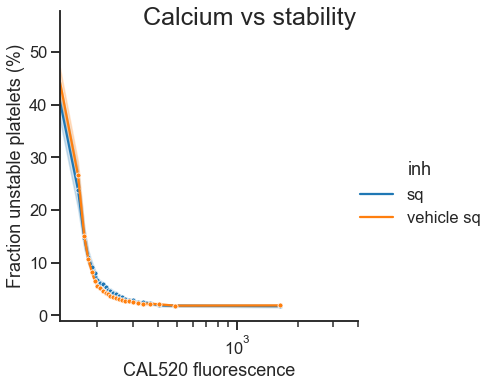

In [49]:
dfg1=dfg.groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg2=dfg[dfg.stab>3].groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg3=dfg2/dfg1*100
dfg3=dfg3.reset_index()


g=sns.relplot(data=dfg3,y='pid',ci=70,x=bin_var,hue='inh',kind='line',marker='o',markersize=5,hue_order=inh_order)#row='phase'
g.set(xscale='log',xlim=[130,4000])
g.fig.suptitle('Calcium vs stability',fontsize=25) 
g.set_xlabels("CAL520 fluorescence")
g.set_ylabels("Fraction unstable platelets (%)")
#dfg1 = dfg1.groupby(level=[0,1]).apply(lambda x:100 * x / float(x.sum())).reset_index()

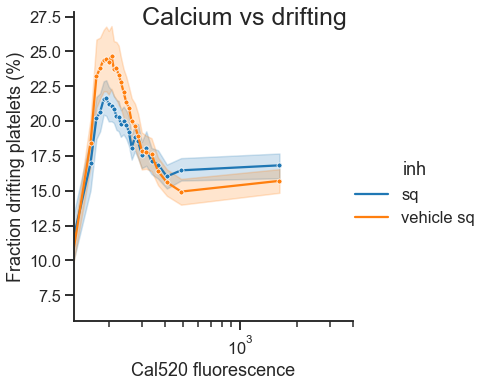

In [50]:
dfg1=dfg.groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg2=dfg[dfg.movement=='drifting'].groupby(['inh','inh_exp_id',bin_var]).agg({'pid':'count'})#'phase',
dfg3=dfg2/dfg1*100
dfg3=dfg3.reset_index()


g=sns.relplot(data=dfg3,y='pid',ci=70,x=bin_var,hue='inh',kind='line',marker='o',markersize=5,hue_order=inh_order)#row='phase'
g.set(xscale='log',xlim=[130,4000])
g.fig.suptitle('Calcium vs drifting',fontsize=25) 
g.set_xlabels("Cal520 fluorescence")
g.set_ylabels("Fraction drifting platelets (%)")

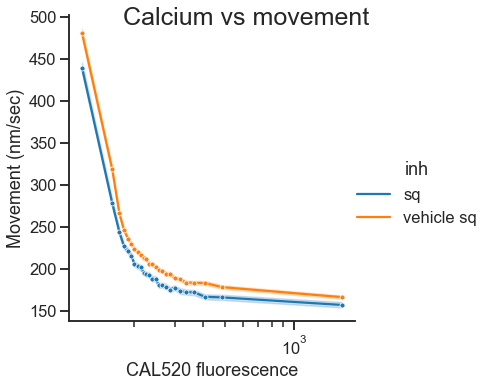

In [51]:
dfg['dv_s']=dfg['dv']*1000/3.1
g=sns.relplot(data=dfg,y='dv_s',ci=99,x=bin_var,hue='inh',marker='o',markersize=5,kind='line', hue_order=inh_order)
g.set(xscale='log')
g.fig.suptitle('Calcium vs movement',fontsize=25) 
g.set_xlabels("CAL520 fluorescence")
g.set_ylabels("Movement (nm/sec)")

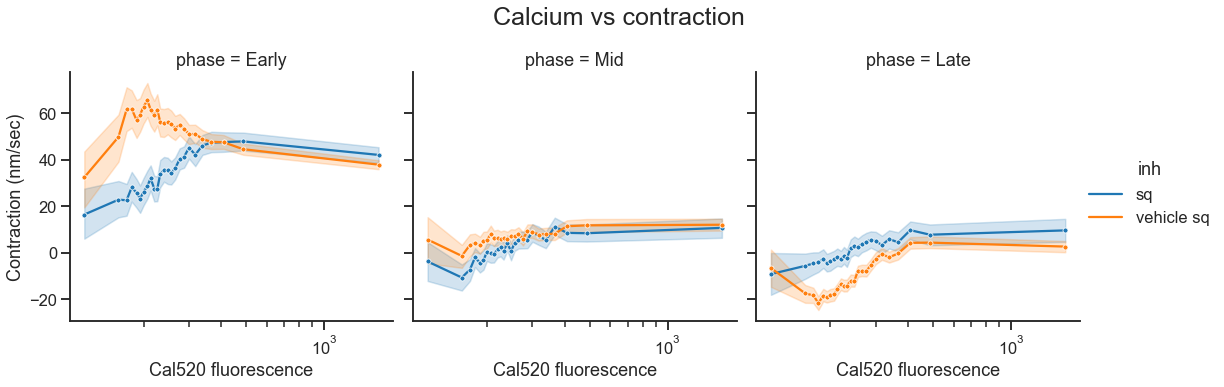

In [52]:
g=sns.relplot(data=dfg,y='cont_s',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5,kind='line',
              hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Calcium vs contraction',fontsize=25) 
g.set_xlabels("Cal520 fluorescence")
g.set_ylabels("Contraction (nm/sec)")

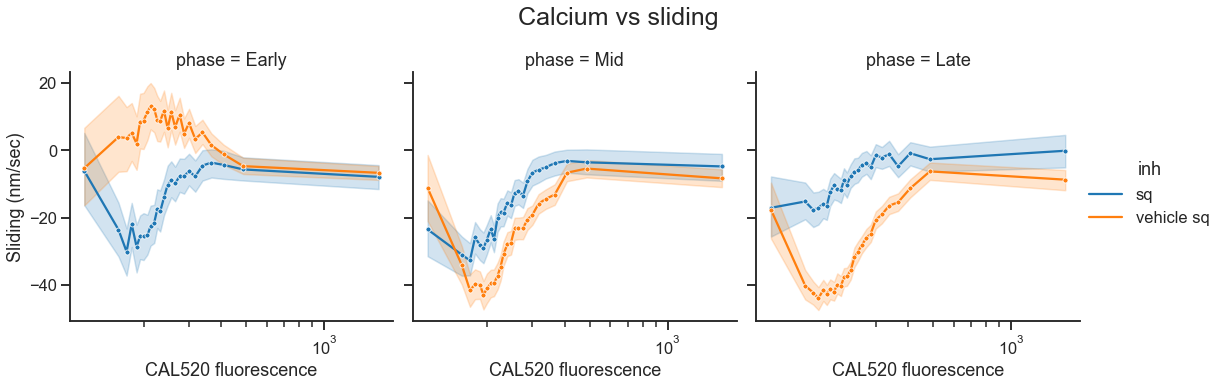

In [53]:
dfg['dvy_s']=dfg.dvy*1000/3.1
g=sns.relplot(data=dfg,y='dvy_s',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5,kind='line', 
              hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Calcium vs sliding',fontsize=25) 
g.set_xlabels("CAL520 fluorescence")
g.set_ylabels("Sliding (nm/sec)")

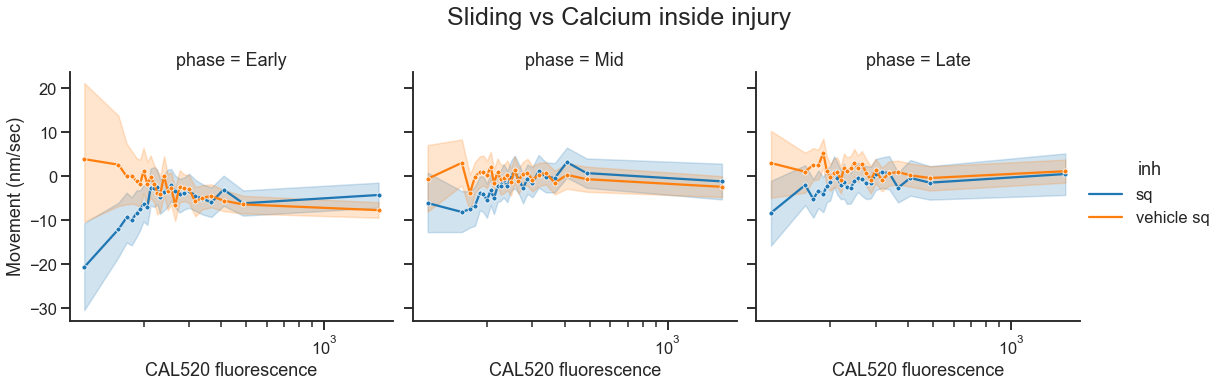

In [54]:
g=sns.relplot(data=dfg[dfg.inside_injury==True],y='dvy_s',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5,kind='line',
              hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Sliding vs Calcium inside injury',fontsize=25) 
g.set_xlabels("CAL520 fluorescence")
g.set_ylabels("Movement (nm/sec)")

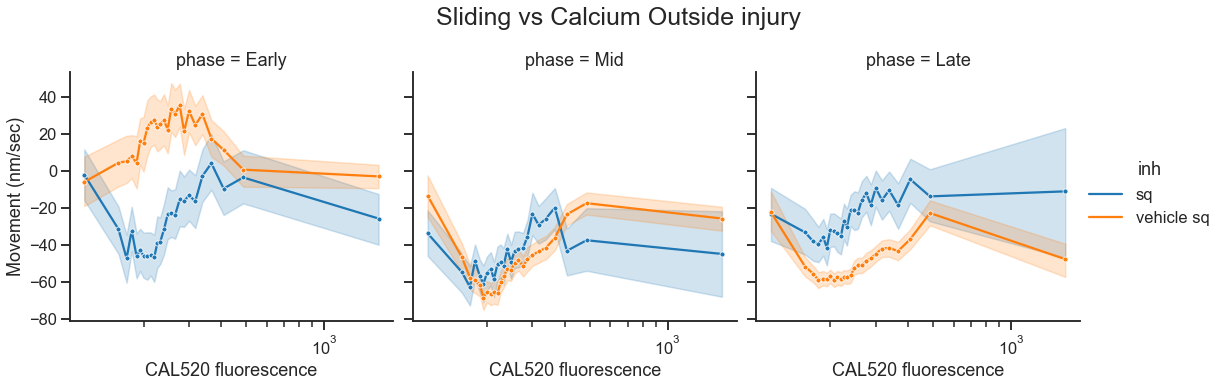

In [55]:
g=sns.relplot(data=dfg[dfg.inside_injury==False],y='dvy_s',ci=99,x=bin_var,hue='inh',col='phase',marker='o',markersize=5,
              kind='line',hue_order=inh_order)
g.set(xscale='log')
plt.subplots_adjust(top=0.80)
g.fig.suptitle('Sliding vs Calcium Outside injury',fontsize=25) 
g.set_xlabels("CAL520 fluorescence")
g.set_ylabels("Movement (nm/sec)")

In [56]:
df.loc[:,'minute'] = pd.cut(df['time'], 10, labels=list(range(1,11,1)))


dfg=df.groupby(['inh','exp_id','minute','inside_injury']).mean()['dvz_s'].reset_index()
dfg

sns.color_palette("Paired")
sns.set_palette('tab10')

sns.color_palette()

sns.color_palette("tab10")

Text(0.5, 0.98, 'Average movement in z axis (nm/sec)')

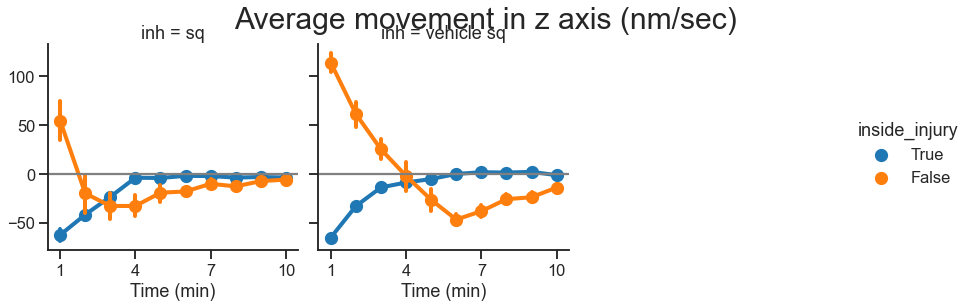

In [57]:
dfg=df.groupby(['inh','exp_id','minute','inside_injury']).mean()['dvz_s'].reset_index()

g = sns.catplot(x='minute', y='dvz_s', data=dfg, col='inh',ci=70, kind='point',col_order=inh_order,hue='inside_injury',hue_order=bol_order,height=4, col_wrap=3)
#g.set_ylabels("Average movement in z axis (nm/sec)")
#g._legend.set_title("Platelet position relative laser injury")
g.map(plt.axhline, y=0, ls="-", c=".5")
g.set(xticks=[0,3,6,9])

g.set_xlabels("Time (min)")
#sns.plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Average movement in z axis (nm/sec)",fontsize=30) 

Text(0.5, 0.98, 'Average movement in z axis (nm/sec)')

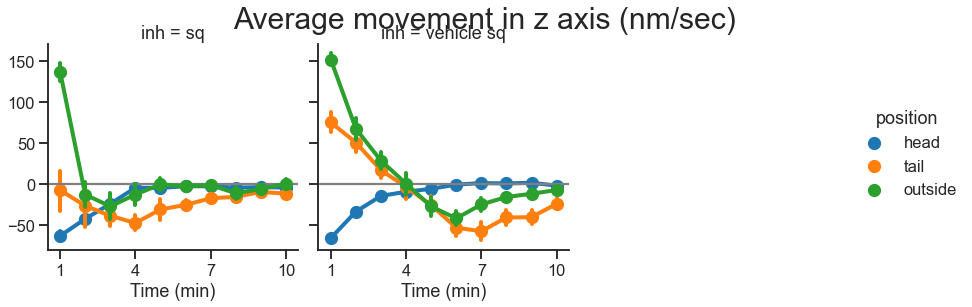

In [58]:
dfg=df.groupby(['inh','exp_id','minute','position']).mean()['dvz_s'].reset_index()

g = sns.catplot(x='minute', y='dvz_s', data=dfg, col='inh',ci=70, kind='point',col_order=inh_order,hue='position',
                hue_order=position_order,height=4, col_wrap=3,)
#g.set_ylabels("Average movement in z axis (nm/sec)")
#g._legend.set_title("Platelet position relative laser injury")
g.map(plt.axhline, y=0, ls="-", c=".5")
g.set(xticks=[0,3,6,9])

g.set_xlabels("Time (min)")
#sns.plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Average movement in z axis (nm/sec)",fontsize=30) 

Text(0.5, 0.98, 'Average movement in y axis (nm/sec)')

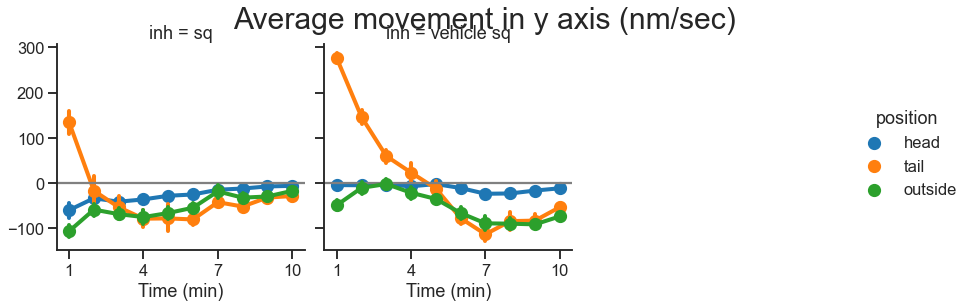

In [59]:
dfg=df.groupby(['inh','exp_id','minute','position']).mean()['dvy'].reset_index()
dfg['dvy_s']=dfg.dvy*1000/3.1

g = sns.catplot(x='minute', y='dvy_s', data=dfg, col='inh',ci=70, kind='point',col_order=inh_order,hue='position',
                hue_order=position_order,height=4, col_wrap=3)
#g.set_ylabels("Average movement in z axis (nm/sec)")
#g._legend.set_title("Platelet position relative laser injury")
g.map(plt.axhline, y=0, ls="-", c=".5")
g.set(xticks=[0,3,6,9])

g.set_xlabels("Time (min)")
#sns.plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Average movement in y axis (nm/sec)",fontsize=30) 

Text(0.5, 0.98, 'Average contraction (nm/sec)')

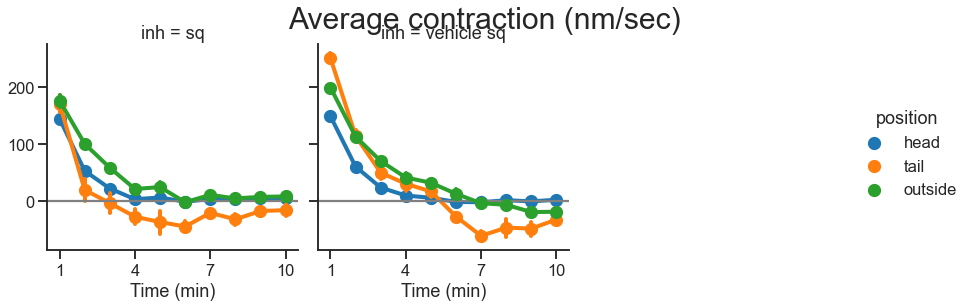

In [60]:
dfg=df.groupby(['inh','exp_id','minute','position']).mean()['cont_s'].reset_index()

g = sns.catplot(x='minute', y='cont_s', data=dfg, col='inh',ci=70, kind='point',col_order=inh_order,hue='position',
                hue_order=position_order,height=4, col_wrap=3)
#g.set_ylabels("Average movement in z axis (nm/sec)")
#g._legend.set_title("Platelet position relative laser injury")
g.map(plt.axhline, y=0, ls="-", c=".5")
g.set(xticks=[0,3,6,9])

g.set_xlabels("Time (min)")
#sns.plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Average contraction (nm/sec)",fontsize=30) 

['position', 'inh', 'inh_exp_id', 'time']


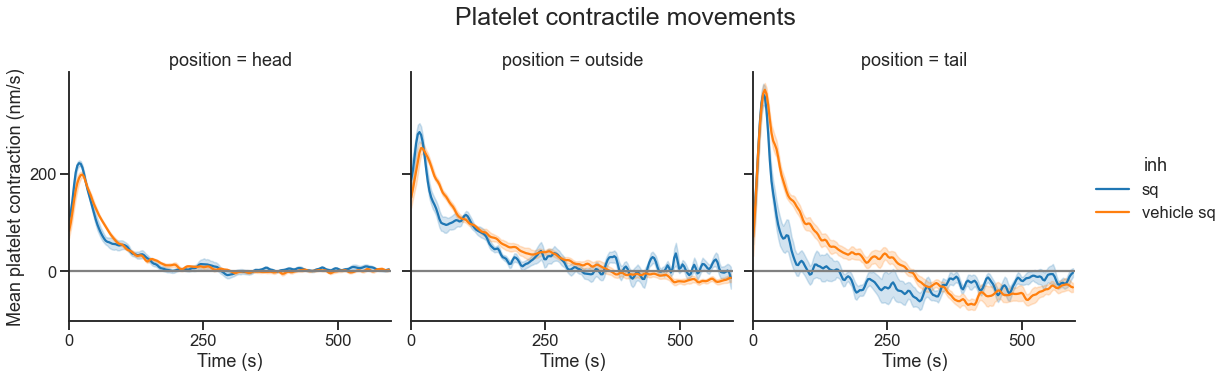

In [61]:
#order=['ctrl','biva','par4-+']
grouping_var='position'
x_var=['time']
y_var='cont_s'
df_grouped=rolling_mean(df,grouping_var,y_var,x_var)

g = sns.relplot(x="time", y='roll', hue='inh',hue_order=inh_order,ci=70,col='position', data=df_grouped, kind="line",height=5,aspect=1,legend=True)
g.set(xlim=[0,600],xticks=[0,250,500],yticks=[0,200])
plt.legend(bbox_to_anchor=(0.4, 1), loc=2, borderaxespad=0., frameon=False, facecolor ='white', ncol=1,labels=inh_order)
g.map(plt.axhline, y=0, ls="-", c=".5")
g.set_ylabels("Mean platelet contraction (nm/s)")
g.set_xlabels("Time (s)")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Platelet contractile movements',fontsize=25)

plt.savefig(results_folder+f'\\lineplot_contraction_all {grouping_var} {inh_order} rolling.svg',transparent=True)
plt.savefig(results_folder+f'\\lineplot_contraction_all {grouping_var} {inh_order} rolling.png',bbox_inches='tight', dpi=300)

['position', 'inh', 'inh_exp_id', 'time']


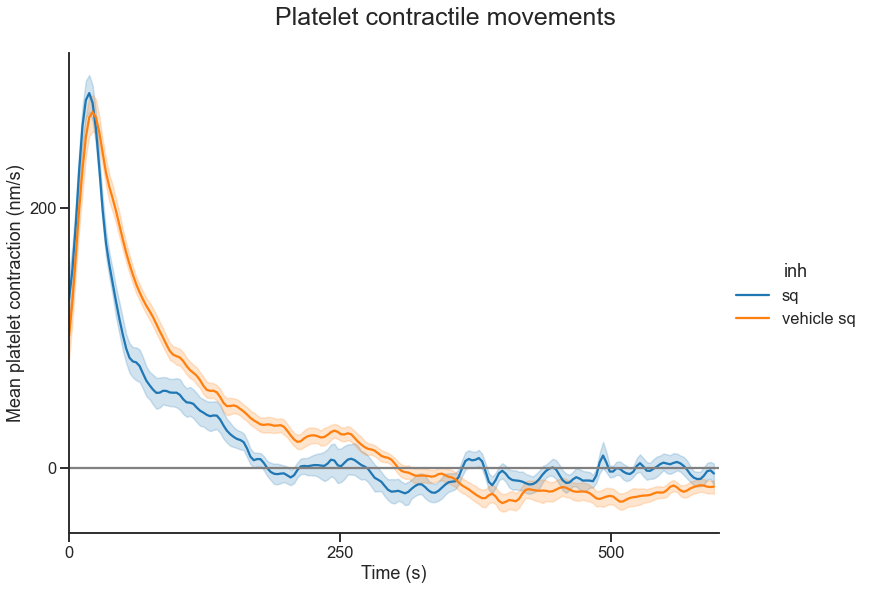

In [62]:
grouping_var='position'
x_var=['time']
y_var='cont_s'
df_grouped=rolling_mean(df,grouping_var,y_var,x_var)

g = sns.relplot(x="time", y='roll', hue='inh',hue_order=inh_order,ci=70, data=df_grouped, kind="line",height=8,aspect=1.25,legend=True)


g.set(xlim=[0,600],xticks=[0,250,500],yticks=[0,200])
plt.legend(bbox_to_anchor=(0.4, 1), loc=2, borderaxespad=0., frameon=False, facecolor ='white', ncol=1,labels=inh_order)
g.map(plt.axhline, y=0, ls="-", c=".5")
g.set_ylabels("Mean platelet contraction (nm/s)")
g.set_xlabels("Time (s)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Platelet contractile movements',fontsize=25)

plt.savefig(results_folder+f'\\lineplot_contraction_all blackman rolling.svg',transparent=True)
#plt.savefig('lineplot_contractionthr.png',bbox_inches='tight', dpi=300)

['inside_injury', 'inh', 'inh_exp_id', 'time']


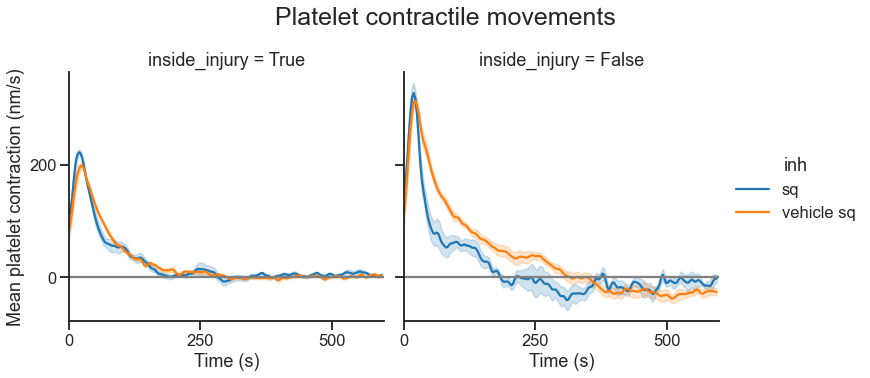

In [63]:
grouping_var='inside_injury'
x_var=['time']
y_var='cont_s'
df_grouped=rolling_mean(df,grouping_var,y_var,x_var)


g = sns.relplot(x="time", y='roll', hue='inh',hue_order=inh_order,ci=70,col='inside_injury', col_order=bol_order,
                data=df_grouped, kind="line",height=5,aspect=1,legend=True)
g.set(xlim=[0,600],xticks=[0,250,500],yticks=[0,200])
plt.legend(bbox_to_anchor=(0.4, 1), loc=2, borderaxespad=0., frameon=False, facecolor ='white', ncol=1,labels=inh_order)
g.map(plt.axhline, y=0, ls="-", c=".5")
g.set_ylabels("Mean platelet contraction (nm/s)")
g.set_xlabels("Time (s)")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Platelet contractile movements',fontsize=25)

plt.savefig(results_folder+f'\\lineplot_contraction_all blackman rolling.svg',transparent=True)
#plt.savefig('lineplot_contractionthr.png',bbox_inches='tight', dpi=300)